# Imports, nice figures, and constants

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from os import listdir
import pandas as pd
pd.options.mode.chained_assignment = None
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit, minimize_scalar
from scipy.stats import chisquare
import itertools as it
from operator import itemgetter
from heapq import heappush, heappop, heapify
from IPython.display import display, HTML

%matplotlib qt
%config InlineBackend.figure_format = 'png'

#Set matplotlib rcParams here (e.g. figsize, fontsize, etc)
import matplotlib as mpl
def reset_mpl_params():
    #%matplotlib inline
    mpl.rcParams['figure.figsize'] = (7,5)
    mpl.rcParams['axes.titlesize'] = 18
    mpl.rcParams['axes.labelsize'] = 15
    mpl.rcParams['axes.formatter.limits'] = (-2,3)
    mpl.rcParams["legend.loc"] = 'best'
    mpl.rcParams["legend.fontsize"] = 'medium'
    mpl.rcParams['lines.markersize'] = 4

# Data files

In [13]:
#Global variable dataframe
df = None

#Key-value pairs of dates and dataframes
date_dict = {}

#Loading data files
def load_data(date):
    global df
    
    if date in date_dict:
        #Update dictionary of current data
        df = date_dict[date]
    
    #Itemizing all the data files by date
    else:
        
        #Spin transport device, 500 nm d1, 14T PPMS
        #T = 1.8K, H = 13T
        if date == '20190907':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20190907_RuCl3_spinTransport_500uA_277Hz.dat'
            df = pd.read_csv(path, skiprows=0, delimiter="\t")
            title_str = 'RuCl3'

        #Spin transport device, 500 nm d1, 14T PPMS
        elif date == '20190908':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20190908_RuCl3_spinTransport_800uA_33Hz.dat'
            df = pd.read_csv(path, skiprows=0, delimiter="\t")
            title_str = 'RuCl3'

        #Spin transport device, 500 nm d1, 14T PPMS, 25 Hz
        elif date == '20190911':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20190911_RuCl3_spinTransport_1mA_25Hz_run2.dat'
            df = pd.read_csv(path, skiprows=0, delimiter="\t")
            title_str = 'RuCl$_3$'

#         14T PPMS
#         800 uA rms, R = LI1
#         Spin transport device, 500 nm d1
#         Frequency dependence
#         Temperatures = [300, 200, 100, 50, 10]
#         9/10/2019
        elif date == '20190910':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20190910_RuCl3_spinTransport_800uA_freqSweep.dat'
            df = pd.read_csv(path, skiprows=0, delimiter="\t")

#         14T PPMS
#         900 uA rms, R = LI1, 25.777 HZ
#         Spin transport device, 500 nm d1. Warmup and cool down at 13 T at different angles.
#         Angles = [0, 20, 40, 60, 80, 100, 120]
        elif date == '20190920':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20190920_RuCl3_spinTransport_900uA_25Hz.dat'
            df = pd.read_csv(path, skiprows=0, delimiter="\t")

#         9T PPMS
#         0.9 mA rms, 25.7 Hz, R(500 nm)=LI1, R(750nm)=LI2
#         500 nm d1 and 750 nm d2. Just measuring ZF temperature sweep.
#         Field = 0
        elif date == '20191001':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20191001_RuCl3_spinTransport_500nm_750nm.dat'
            df = pd.read_csv(path, skiprows=0, delimiter="\t")

    #     9T PPMS, frequency dependence of 500 nm d1, looked kinda all over the place but here's the data anyway
        elif date == '20191002':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20191002_RuCl3_spinTransport_500nm_s1.dat'
            df = pd.read_csv(path, skiprows=0, delimiter="\t")

#         14T PPMS
#         0.9 mA rms, 25.7 Hz, R=LI1
#         Device 750 nm d1. 500 nm d2 somehow was destroyed in the process of contacting (Pt scratched off). 
#         Measuring with 13 T in-plane field at different angles.
#         Angles = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180]
        elif date == '20191003':
            title_str = ['RuCl$_3$ 750 nm d1']
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20191003_RuCl3_750nm_d1_900uA_25Hz.dat'
            df = pd.read_csv(path, skiprows=0, delimiter="\t")

#         14T PPMS
#         0.9 mA rms, 25.7 Hz
#         R_1ω=LI2, R_2ω=LI4
#         Device 750 nm d2. Performing temperature sweeps at various in-plane fields
#         Fields = [2,4]
        elif date == '20191210':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20191210_RuCl3_750nm_d2_900uA_25Hz.dat'
            df = pd.read_csv(path, skiprows=0, delimiter="\t")

#         14T PPMS
#         0.9 mA rms, 25.7 Hz
#         R_1ω=LI2, R_2ω=LI4
#         Device 750 nm d3. Flake placed on top of Pt contacts on Si oxide substrate.
#         Performing temperature sweeps at various in-plane fields
#         Fields = [2,4,6,8,10,12]
        elif date == '20191211':
            title_str = ['RuCl$_3$ 750 nm d3']
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20191211_RuCl3_750nm_d3_1mA_25Hz.dat'
            df = pd.read_csv(path, skiprows=0, delimiter="\t")

#         Dummy measurents in 9T started on 12/23/2019; both close and far contacts
        elif date[:-2] == '20191223':
            #5.8 Hz
            #'20191223_1'
            if date[-1] == '1':
                path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/Dummy/dummy_750nm_5777mHz_1mAPk_3sTC_close_far_cooldown.dat'

            #25.8 Hz
            #'20191223_2'
            elif date[-1] == '2':
                path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/Dummy/dummy_750nm_25777mHz_1mA_close_far_cooldown.dat'


            #51.8 Hz
            #'20191223_3'
            elif date[-1] == '3':
                path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/Dummy/dummy_750nm_51777mHz_1mAPk_1sTC_close_far_cooldown.dat'

            #81.8 Hz
            #'20191223_4'
            elif date[-1] == '4':
                path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/Dummy/dummy_750nm_81777mHz_1mAPk_400msTC_close_far_cooldown.dat'

            #117.8 Hz
            #'20191223_5'
            elif date[-1] == '5':
                path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/Dummy/dummy_750nm_117777mHz_1mAPk_close_far_cooldown.dat'

            #157.8 Hz
            #'20191223_6'
            elif date[-1] == '6':
                path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/Dummy/dummy_750nm_157777mHz_1mAPk_close_far_cooldown.dat'

            #217.8 Hz
            #'20191223_7'
            elif date[-1] == '7':
                path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/Dummy/dummy_750nm_217777mHz_1mAPk_close_far_cooldown.dat'

            #11.8 Hz
            #'20191223_8'
            elif date[-1] == '8':
                path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/Dummy/dummy_750nm_11777mHz_1mAPk_2sTC_close_far_cooldown.dat'

            else:
                raise ValueError

            df = pd.read_csv(path, skiprows=0, delimiter="\t")

#         Fields = [0.1, 1, 2, 3, 4, 5, 6, 7, 9]
        elif date == '20200319':
            title_str = ['RuCl$_3$ 750 nm d4', 'RuCl$_3$ 750 nm d5']
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200319_RuCl3_750nm_d4_d5_run2.dat'
            df = pd.read_csv(path, skiprows=0, delimiter="\t")
            
#         Field = 0.1T
        elif date == '20200325':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200325_RuCl3_750nm_d4_100uA_d5_2w.dat'
            title_str = ['RuCl$_3$ 750 nm d4', 'RuCl$_3$ 2$\omega$ 750 nm d5']
            df = pd.read_csv(path, skiprows=0, delimiter="\t")
            
#         Fields = [7,8]
        elif date == '20200325_2':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200325_RuCl3_750nm_d4_100uA_d5_2w_anglesweep.dat'
            title_str = ['RuCl$_3$ 750 nm d4', 'RuCl$_3$ 2$\omega$ 750 nm d5']
            df = pd.read_csv(path, skiprows=0, delimiter="\t")
            
        #Angle sweeps for 750 nm d4 and d5. The start of the new interesting data.
        #field_arr = [-9, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9]     #for base temperature
#         field_arr = [-9, -4, -1, 1, 4, 9]     #for different temperatures
#         angle_arr = [5*i for i in range(73)]
#         #temp_arr = [1.8, 20, 40, 60, 80, 100]
#         temp_arr = [1.8, 40, 60, 80, 100, 120]     #20 gives weirdness
        elif date == '20200326':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200326_RuCl3_750nm_d4_500uA_d5_anglesweeps.dat'
            title_str = ['RuCl$_3$ 750 nm d4', 'RuCl$_3$ 750 nm d5']
            df = pd.read_csv(path, skiprows=0, delimiter="\t")
        
#         Fields = [9]     #for different temperatures
#         angle_arr = [5*i for i in range(73)]
#         temp_arr = [1.8, 20, 40, 60]
        elif date == '20200413':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200413_RuCl3_750nm_d4_500uA_d5_9T_currents_anglesweeps.dat'
            title_str = ['RuCl$_3$ 750 nm d4', 'RuCl$_3$ 750 nm d5']
            df = pd.read_csv(path, skiprows=0, delimiter="\t")
        
#         field_arr = [9]     
#         angle_arr = [5*i for i in range(73)]
#         temp_arr = [1.8]
#         current_arr = [i*50e-6 for i in range(1,21)]
        elif date == '20200416':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200416_RuCl3_750nm_d4_500uA_d5_9T_50-1000uA_anglesweeps.dat'
            path2 = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200421_RuCl3_750nm_d4_d5_9T_5,10,15,20,1000uA_anglesweeps.dat'
            title_str = ['RuCl$_3$ 750 nm d4', 'RuCl$_3$ 750 nm d5']
            df = pd.read_csv(path, skiprows=0, delimiter="\t")
            df2 = pd.read_csv(path2, skiprows=0, delimiter="\t")
            df = df.append(df2)
            df['Current (A)'] = df['Current_1 (A)'].values
        
        elif date == '20200423':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200423_RuCl3_750nmd4d5_9T_1p8K_150deg_500uA(5nA1s)_TC10s_CurrentSweep.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            path2 = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200425_RuCl3_750nmd4d5_1T_1p8K_150deg_500uA(5nA1s)_TC20s_CurrentSweep.dat'
            df2 = pd.read_csv(path2, skiprows=0, delimiter='\t')
            path3 = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200428_RuCl3_750nmd4d5_0T_1p8K_150deg_500uA(5nA1s)_TC20s_CurrentSweep.dat'
            df3 = pd.read_csv(path3, skiprows=0, delimiter='\t')
            df = df.append(df2)
            df = df.append(df3)
            
        elif date == '20200425':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200425_RuCl3_750nmd4d5_9T_1p8K_150deg_4uA(100pA1s)_TC20s_CurrentSweep.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
        
        elif date == '20200430':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200428_RuCl3_750nmd4d5_9T_80K_500uA_AngleSweep.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            df['Current (A)'] = df['Current_1 (A)'].values
            path2 = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200430_RuCl3_750nmd4d5_9T_80K_1mA_AngleSweep.dat'
            df2 = pd.read_csv(path2, skiprows=0, delimiter='\t')
            df2['Current (A)'] = df2['Current_1 (A)'].values * 2
            df = df.append(df2)
            
        elif date == '20200501':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200501_RuCl3_750nmd4d5_9T_1p8K_1mA_AngleSweep_test2_restartedsine.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            df['Current (A)'] = df['Current_1 (A)'].values
            df['R_nl'] = df['LI1_X (V)'].values / df['Current (A)'].values
            
        elif date == '20200502':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200502_RuCl3_750nmd4d5_9T_warmup.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            df['Current (A)'] = df['Current_1 (A)'].values
            df['R_nl'] = df['LI1_X (V)'].values / df['Current (A)'].values
            
        elif date == '20200504':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200504_RuCl3_750nm_d4_d5_1w2w_0T_cooldown.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            df['Current (A)'] = df['Current_1 (A)'].values
            df['R_nl'] = df['LI1_X (V)'].values / df['Current (A)'].values
            
        elif date == '20200505':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200505_RuCl3_750nm_d4_d5_1w2w_9T_1p8K_1mA_anglesweep.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            df['Current (A)'] = df['Current_1 (A)'].values
            df['R_nl'] = df['LI1_X (V)'].values / df['Current (A)'].values
            
        elif date == '20200505_2':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200505_RuCl3_750nm_d4_d5_5T_warmup.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            path2 = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200505_RuCl3_750nm_d4_d5_5T_cooldown_noACLI3.dat'
            df2 = pd.read_csv(path2, skiprows=0, delimiter='\t')
            df = df.append(df2)
            df['Current (A)'] = df['Current_1 (A)'].values
            df['R_nl'] = df['LI1_X (V)'].values / df['Current (A)'].values
            
        elif date == '20200506':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200506_RuCl3_750nm_d4_d5_1p8K_testfieldsweep.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            df['Current (A)'] = df['Current_1 (A)'].values
            df['R_nl'] = df['LI1_X (V)'].values / df['Current (A)'].values
            
        elif date == '20200511':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/202005011_d4_Pt_MR_tempscan_fieldsweeps.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            
        elif date == '20200513':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/202005013_d4_Pt_MR_fieldscan_anglesweeps.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            df['LI2_X (V)'] = -df['LI2_X (V)'].values
            
        elif date == '20200807':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200807_RuCl3_d14_6PointNonlocal.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
        
        elif date == '20200807_2':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200807_RuCl3_d14_6PointNonlocal_anglesweeps_10T_pause.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
        
        elif date == '20200807_3':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200807_RuCl3_d14_6PointNonlocal_anglesweeps_10T_pause_120s.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            
        elif date == '20200807_4':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200807_RuCl3_d14_6PointNonlocal_anglesweeps_10T_14T_277Hz.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
        
        elif date == '20200807_5':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200807_RuCl3_d14_6PointNonlocal_anglesweeps_14T_277Hz_ACcoupling.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            
        elif date == '20200808':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200808_RuCl3_d14_6PointNonlocal_tempscan_fieldsweeps.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            display(df)
            path2 = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200809_RuCl3_d14_6PointNonlocal_tempscan_fieldsweeps_90deg.dat'
            df2 = pd.read_csv(path2, skiprows=0, delimiter='\t')
            display(df2)
            df = df.append(df2)
            
        elif date == '20200809':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200809_RuCl3_d14_6PointNonlocal_tempscan_fieldsweeps_90deg.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            
        elif date == '20200810':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200810_RuCl3_d14_6PointNonlocal_anglescan_fieldsweeps.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200810_RuCl3_d14_6PointNonlocal_anglescan_fieldsweeps_25degstart.dat'
            df2 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df = df.append(df2)
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200811_RuCl3_d14_6PointNonlocal_anglescan_fieldsweeps_75degstart.dat'
            df3 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df = df.append(df3)
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200812_RuCl3_d14_6PointNonlocal_anglescan_fieldsweeps_170degstart.dat'
            df4 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df = df.append(df4)
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200813_RuCl3_d14_6PointNonlocal_anglescan_fieldsweeps_240degstart.dat'
            df5 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df = df.append(df5)
            
        elif date == '20200815':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200814_RuCl3_d14_6PointNonlocal_tempscan_anglescan_delay.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200816_RuCl3_d14_6PointNonlocal_tempscan_anglescan_delay_7T.dat'
            df2 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df = df.append(df2)
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200816_RuCl3_d14_6PointNonlocal_tempscan_anglescan_delay_7T_2K.dat'
            df = df.append(pd.read_csv(path, skiprows=0, delimiter='\t'))
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200817_RuCl3_d14_6PointNonlocal_tempscan_anglescan_delay_4T.dat'
            df = df.append(pd.read_csv(path, skiprows=0, delimiter='\t'))
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200817_RuCl3_d14_6PointNonlocal_tempscan_anglescan_delay_1T.dat'
            df = df.append(pd.read_csv(path, skiprows=0, delimiter='\t'))
            
        elif date == '20200828':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200828_d11_6point_gold_nonlocal750nm.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t'); df['Current (A)'] = 200e-6
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200828_d11_6point_gold_nonlocal750nm_500uA_9T_anglesweeps.dat'
            df2 = pd.read_csv(path, skiprows=0, delimiter='\t'); df2['Current (A)'] = 500e-6
            df = df.append(df2)
            
        elif date == '20200829':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200829_d11_6point_gold_nonlocal750nm_500uA_0deg_tempscan_fieldsweeps.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200830_d11_6point_gold_nonlocal750nm_500uA_90deg_tempscan_fieldsweeps.dat'
            df2 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df = df.append(df2)
            
        elif date == '20200831':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200831_TiPt_control_6point_nonlocal750nm.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200901_TiPt_control_6point_nonlocal750nm_tempscan_anglesweeps.dat'
            df2 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df = df.append(df2)
            
        elif date == '20200902':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200902_RuCl3_d13_6Point750nmNonlocal_TiPt_tempscan_anglesweeps_10T.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200902_RuCl3_d13_6Point750nmNonlocal_TiPt.dat'
            df2 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df = df.append(df2)
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200904_RuCl3_d13_6Point750nmNonlocal_TiPt_tempscan_anglesweeps_14T.dat'
            df2 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df = df.append(df2)
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200904_RuCl3_d13_6Point750nmNonlocal_TiPt_tempscan_anglesweeps_8T.dat'
            df2 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df = df.append(df2)
            
        elif date == '20200922':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200922_RuCl3_d8_6PointHallBar_RxxRxy_controlHallBar_Rxx_Pt.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            
        elif date == '20200923':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200923_RuCl3_d8_6PointHallBar_RxxRxy_controlHallBar_Rxy_Pt_200uA.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            
        elif date == '20200930':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20200930_RuCl3_d15_4distanceNonlocal_1p5um_0p5um_50uA.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            df['Current (A)'] = 50e-6
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201001_RuCl3_d15_4distanceNonlocal_1p5um_0p5um_100uA_14T.dat'
            df2 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df2['Current (A)'] = 100e-6
            df = df.append(df2)
            
        elif date == '20201002':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201002_RuCl3_d15_4distanceNonlocal_5um_10um_100uA_II.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            df['Current (A)'] = 100e-6
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201004_RuCl3_d15_4distanceNonlocal_5um_10um_200uA.dat'
            df2 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df2['Current (A)'] = 200e-6
            df = df.append(df2)
            
            
        elif date == '20201005':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201005_RuCl3_d7_HallBar_Pt_Vxx_Vxy_750uA.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            df['Current (A)'] = 750e-6
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201007_RuCl3_d7_HallBar_Pt_Vxx_Vxy_1mA.dat'
            df2 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df2['Current (A)'] = 1e-3
            df = df.append(df2)
            
        elif date == '20201008':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201008_RuCl3_d7_HallBar_Pt_2mA.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            df['Current (A)'] = 2e-3
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201008_RuCl3_d7_HallBar_Pt_3mA.dat'
            df2 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df2['Current (A)'] = 3e-3
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201008_RuCl3_d7_HallBar_Pt_4mA.dat'
            df3 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df3['Current (A)'] = 4e-3
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201008_RuCl3_d7_HallBar_Pt_4mA_90deg_tempscan_anglesweeps.dat'
            df4 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df4['Current (A)'] = 4e-3
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201009_RuCl3_d7_HallBar_Pt_5mA.dat'
            df5 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df5['Current (A)'] = 5e-3
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201009_RuCl3_d7_HallBar_Pt_6mA.dat'
            df6 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df6['Current (A)'] = 6e-3
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201010_RuCl3_d7_HallBar_Pt_3mA_tempscan_anglesweeps.dat'
            df7 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df7['Current (A)'] = 3e-3
            df = df.append([df2,df3,df4,df5,df6,df7])
            
        elif date == '20201210':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201210_d18_angles_LI2_nonlocal_1w_LI3_nonlocal_1w_100uA.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            df['Current (A)'] = 100e-6; df['Harmonic'] = 1; df['Frequency (Hz)'] = 277; df['Float? ()'] = 0
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201211_d18_angles_LI2_nonlocal_1w_LI3_nonlocal_1w_300uA.dat'
            df2 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df2['Current (A)'] = 300e-6; df2['Harmonic'] = 1; df2['Frequency (Hz)'] = 277; df2['Float? ()'] = 0
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201212_d18_angles_LI2_nonlocal_2w_LI3_nonlocal_2w_300uA.dat'
            df3 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df3['Current (A)'] = 300e-6; df3['Harmonic'] = 2; df3['Frequency (Hz)'] = 277; df3['Float? ()'] = 0
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201213_d18_angles_LI2_nonlocal_1w_LI3_nonlocal_1w_100uA_9T_13Hz.dat'
            df4 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df4['Current (A)'] = 100e-6; df4['Harmonic'] = 1; df4['Frequency (Hz)'] = 13; df4['Float? ()'] = 0
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201214_d18_angles_LI2_nonlocal_1w_LI3_nonlocal_1w_100uA_9T_25Hz_preamps.dat'
            df5 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df5['Current (A)'] = 100e-6; df5['Harmonic'] = 1; df5['Frequency (Hz)'] = 25; df5['Float? ()'] = 0
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201213_d18_angles_LI2_nonlocal_1w_LI3_nonlocal_1w_100uA_9T_275deg_cooldown.dat'
            df6 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df6['Current (A)'] = 100e-6; df6['Harmonic'] = 1; df6['Frequency (Hz)'] = 277; df6['Float? ()'] = 0
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201214_d18_angles_LI2_nonlocal_1w_LI3_nonlocal_1w_100uA_9T_25Hz_preamps_float.dat'
            df7 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df7['Current (A)'] = 100e-6; df7['Harmonic'] = 1; df7['Frequency (Hz)'] = 25; df7['Float? ()'] = 1
            df = df.append([df2,df3,df4,df5,df6,df7])
            
        elif date == '20201218':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201218_d17_multiangle_LI1_1w_LI2_2w_7p777Hz_200uA_preamps.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            df['Current (A)'] = 200e-6; df['Frequency (Hz)'] = 7.777; df['TC (s)'] = 1; df['Order (filt. ord.)'] = 4
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201219_d17_multiangle_LI1_1w_LI2_2w_7p777Hz_200uA_preamps_fieldscans.dat'
            df2 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df2['Current (A)'] = 200e-6; df2['Frequency (Hz)'] = 7.777; df2['TC (s)'] = 10; df2['Order (filt. ord.)'] = 4
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201229_d17_multiangle_LI1_1w_LI2_1w_200uA_preamps_frequencysweeps_widerband.dat'
            df3 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df3['Current (A)'] = 200e-6; df3['TC (s)'] = 1.5; df3['Order (filt. ord.)'] = 4
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201230_d17_multiangle_LI1_1w_LI2_1w_200uA_preamps_frequencysweeps_TC=5s_n=8.dat'
            df4 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df4['Current (A)'] = 200e-6; df4['TC (s)'] = 5; df4['Order (filt. ord.)'] = 8
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20201231_d17_multiangle_LI1_1w_LI2_1w_200uA_preamps_7p777Hz_TC=1s_n=8.dat'
            df5 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df5['Current (A)'] = 200e-6; df5['TC (s)'] = 1; df5['Order (filt. ord.)'] = 8
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210103_d17_multiangle_LI1_1w_LI2_1w_200uA_preamps_7p777Hz_TC=10s_n=8.dat'
            df6 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df6['Current (A)'] = 200e-6; df6['TC (s)'] = 10; df6['Order (filt. ord.)'] = 8
            df = df.append([df2, df3, df4, df5, df6])
            
        elif date == '20210111':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210112_d14_Ti-Pt_nonlocal+SMR_LI1_local_1w_LI2_nonlocal-1w_LI3_nonlocal-2w_100uA_TC=1s_n=8_tempscan_fieldscan_frequencysweeps.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            df['Current (A)'] = 100e-6; df['TC (s)'] = 1; df['Order (filt. ord.)'] = 8; df['Orientation'] = 'ip'
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210111_d14_Ti-Pt_nonlocal+SMR_LI1_local_1w_LI2_nonlocal-1w_LI3_nonlocal-2w_100uA_TC=10s_n=8_7p777Hz.dat'
            df2 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df2['Current (A)'] = 100e-6; df2['TC (s)'] = 10; df2['Order (filt. ord.)'] = 8; df2['Frequency (Hz)'] = 7.777; df2['Orientation'] = 'ip'
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210113_d14_Ti-Pt_nonlocal+SMR_LI1_local_1w_LI2_nonlocal-1w_LI3_nonlocal-2w_100uA_TC=5s_n=8_777p777Hz.dat'
            df3 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df3['Current (A)'] = 100e-6; df3['TC (s)'] = 5; df3['Order (filt. ord.)'] = 8; df3['Frequency (Hz)'] = 777.777; df3['Orientation'] = 'ip'
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210115_d14_Ti-Pt_6pointnonlocal_LI1-local_LI2-nonlocal-1w_LI3-nonlocal-2w_100uA_1p11111kHz_TC=5s_n=8.dat'
            df4 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df4['Current (A)'] = 100e-6; df4['TC (s)'] = 5; df4['Order (filt. ord.)'] = 8; df4['Frequency (Hz)'] = 1.1111e3; df4['Orientation'] = 'ip'
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210118_d14_Ti-Pt_6pointnonlocal_LI1-local_LI2-nonlocal-1w_LI3-nonlocal-2w_100uA_1p11111kHz_TC=5s_n=8_oop-field.dat'
            df5 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df5['Current (A)'] = 100e-6; df5['TC (s)'] = 5; df5['Order (filt. ord.)'] = 8; df5['Frequency (Hz)'] = 1.1111e3; df5['Orientation'] = 'oop'
            df = df.append([df2,df3,df4,df5])
            
        elif date == '20210129':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210129_d14_Ti-Pt_nonlocal+SMR_LI1_local_1w_LI2_nonlocal-1w_LI3_nonlocal-2w_100uA_TC=1s_n=8_777p777Hz.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            df['Current (A)'] = 100e-6; df['TC (s)'] = 1
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210129_d14_Ti-Pt_nonlocal+SMR_LI1_local_1w_LI2_nonlocal-1w_LI3_nonlocal-2w_200uA_TC=1s_n=8_777p777Hz.dat'
            df2 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df2['Current (A)'] = 200e-6; df2['TC (s)'] = 1
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210130_d14_Ti-Pt_nonlocal+SMR_LI1_local_1w_LI2_nonlocal-1w_LI3_nonlocal-2w_200uA_TC=1s_n=8_777p777Hz_run2.dat'
            df3 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df3['Current (A)'] = 200e-6; df3['TC (s)'] = 1
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210202_d14_Ti-Pt_nonlocal+SMR_LI1_local_1w_LI2_nonlocal-1w_LI3_nonlocal-2w_200uA_TC=5s_n=8_777p777Hz_oopj.dat'
            df4 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df4['Current (A)'] = 200e-6; df4['TC (s)'] = 5
            df = df.append([df2, df3, df4])
            
        elif date == '20210215':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210215_d13_Ti-Pt_6pointnonlocal_LI1-nonlocal-1w_LI2-nonlocal-2w_LI3-local_100uA_277p777Hz_TC=5s_n=8_oopt-field_TempScanFieldSweeps.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            df['Current (A)'] = 100e-6; df['TC (s)'] = 5; df['Frequency (Hz)'] = 277.777
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210216_d13_Ti-Pt_6pointnonlocal_LI1-nonlocal-1w_LI2-nonlocal-2w_LI3-local_100uA_FrequencyScan_TC=5s_n=8_oopt-field.dat'
            df2 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df2['Current (A)'] = 100e-6; df2['TC (s)'] = 5
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210217_d13_Ti-Pt_6pointnonlocal_LI1-nonlocal-1w_LI2-nonlocal-2w_LI3-local_100uA_1111p111Hz_TC=5s_n=8_oopt-field_TempScanFieldSweeps.dat'
            df3 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df3['Current (A)'] = 100e-6; df3['TC (s)'] = 5
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210218_d13_Ti-Pt_6pointnonlocal_LI1-nonlocal-1w_LI2-nonlocal-2w_LI3-local_100uA_TC=1p5s_n=8_oopt-field_TempScanFrequencySweeps.dat'
            df4 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df4['Current (A)'] = 100e-6; df4['TC (s)'] = 1.5
            df = df.append([df2,df3,df4])
            
        elif date == '20210226':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210226_600nm_Pt_nonlocal_control_LI1_nonlocal_1w_500uA_TC=5s_n=8_7p777Hz.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            df['Current (A)'] = 500e-6; df['TC (s)'] = 5; df['Frequency (Hz)'] = 7.7777; df[' (AC coupled)'] = 'not '
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210226_600nm_Pt_nonlocal_control_LI1_nonlocal_1w_500uA_TC=5s_n=8_FrequencyScanFieldSweeps.dat'
            df2 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df2['Current (A)'] = 500e-6; df2['TC (s)'] = 5; df2[' (AC coupled)'] = 'not '
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210227_600nm_Pt_nonlocal_control_LI1_nonlocal_1w_500uA_TC=5s_n=8_FrequencySweeps.dat'
            df3 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df3['Current (A)'] = 500e-6; df3['TC (s)'] = 5; df3[' (AC coupled)'] = 'not '
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210227_600nm_Pt_nonlocal_control_LI1_nonlocal_1w_500uA_TC=5s_n=8_7p777Hz_ACcoupling.dat'
            df4 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df4['Current (A)'] = 500e-6; df4['TC (s)'] = 5; df4[' (AC coupled)'] = ''
            df = df.append([df2,df3,df4])
            df['LI1_X (V)'] = -df['LI1_X (V)'].values
            
        elif date == '20210304':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210304_d20_Pt_6pointnonlocal_600nm_LI1-nonlocal-1w_LI2-nonlocal-2w_LI3-local_500uA_7p777Hz_TC=5s_n=8_ip_noACcoupling.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            df['Current (A)'] = 500e-6; df['TC (s)'] = 5; df['Frequency (Hz)'] = 7.7777; df[' (AC coupled)'] = 'not '
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210305_d20_Pt_6pointnonlocal_600nm_LI1-nonlocal-1w_LI2-nonlocal-2w_LI3-local_500uA_TC=5s_n=8_ip_noACcoupling_FrequencyScanAngleScan.dat'
            df2 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df2['Current (A)'] = 500e-6; df2['TC (s)'] = 5; df2[' (AC coupled)'] = 'not '
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210307_d20_Pt_6pointnonlocal_600nm_LI1-nonlocal-1w_LI2-nonlocal-2w_LI3-local_500uA_TC=5s_n=8_ip_noACcoupling_TempScanFrequencyScanAngleScan.dat'
            df3 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df3['Current (A)'] = 500e-6; df3['TC (s)'] = 5; df3[' (AC coupled)'] = 'not '
            df = df.append([df2,df3])
            
        elif date == '20210416':
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210416_YIG_spinTransport_LI1_1w_LI2_2w_d=1um_350uA_7p777Hz_run2.dat'
            df = pd.read_csv(path, skiprows=0, delimiter='\t')
            df['Current (A)'] = 350e-6; df['TC (s)'] = 3; df['Frequency (Hz)'] = 7.7777; df[' (AC coupled)'] = 'not '
            path = '/Users/vikramnagarajan/Box/UC Berkeley/Analytis Rotation/Data Files/PPMS/RuCl3/Spin Transport/20210416_YIG_spinTransport_LI1_1w_LI2_2w_d=1um_350uA_TC=3s_n=8_frequencyScan_angleSweeps_300Oe.dat'
            df2 = pd.read_csv(path, skiprows=0, delimiter='\t')
            df2['Current (A)'] = 350e-6; df2['TC (s)'] = 3; df2[' (AC coupled)'] = 'not '
            df = df.append(df2)
                       
        else:
            raise ValueError('date not valid')
            
        #Put the dictionary of data in the parent dictionary, with the date as key
        date_dict[date] = df

def plot_temp():
    fig, ax = plt.subplots(1,1)
    ax.plot(time, temperature, 'bo', markersize=1)
    fig.tight_layout()
    return fig

def plot_phase():
    fig, ax = plt.subplots(1,1)
    ax.plot(time, phase, 'go', markersize=1)
    fig.tight_layout()
    return fig

def plot_phase_temp():
    fig, (ax_temp, ax_phase) = plt.subplots(2,1, sharex=True)
    ax_temp.plot(time, temperature, 'bo', markersize=1)
    ax_phase.plot(time, phase, 'go', markersize=1)
    fig.tight_layout()
    return fig



# Data Cleaning

In [4]:
def getPrefixMultiplier(num):
    num = np.abs(num)
    if num == 0:
        return '',1
    elif num < 0:
        return '',1
    else:
        power = np.floor(np.log10(num))
        power = power-power%3
        if power == -12:
            return 'p',1e12
        if power == -9:
            return 'n',1e9
        if power == -6:
            return '$\mu$',1e6
        if power == -3:
            return 'm',1e3
        if power == 0:
            return '',1
        if power == 3:
            return 'k',1e-3
        if power == 6:
            return 'M',1e-6

def getUnits(param_string):
    split = param_string.split()
    if 'AC' in param_string:
        return 'AC'
    else:
        if split[1] == '(Hz)':
            return 'Hz'
        return split[1][1]

def iterable(obj):
    try:
        iter(obj)
    except Exception:
        return False
    else:
        return True

def separateSweeps(df, sweep_dir='up'):
    if sweep_dir == 'up':
        sep_index = df.index.max()
        df_up = df[:sep_index]
        df_down = df[sep_index:]
    elif sweep_dir == 'down':
        sep_index = df.index.min()
        df_down = df[:sep_index]
        df_up = df[sep_index:]
    else:
        raise ValueError
    sep_df = {'up':df_up, 'down':df_down}
    return sep_df
    
def initialize(time_series):
    time_series -= time_series.min()
    return
    
def extractValues(param_heap, device_info, average=False, sweep_dir='up', sep=False, sweep='up', combine=False, subtract_offset=False, subtract_xmax=False, subtract_ymin=False, offset=0,
                  hampel=False, savgol=False, cmap=plt.get_cmap('magma'), y='V', ylabel='', tc=0, **kwargs):
    global df
    
    num_devices = len(device_info)
    num_outer_constraints = len(param_heap) - 1
    group_titles = []
    units = []
    while(len(param_heap)>1):
        group_titles.append(heappop(param_heap)[1])
    for title in group_titles:
        units.append(getUnits(title))
    #This forms all the groups specified by the constraints. Returns a GroupBy object
    #Next step is to select and subgroup them
    grouped = df.groupby(group_titles).filter(lambda x: len(x)>5000).groupby(group_titles)
    #grouped = df.groupby(group_titles)
    #print([group for group in grouped])
    outer_constraint_dict = {}
    #key is a tuple of the outermost constraints, e.g. (9T, 1.8 K)
    #group is a list of all the tuples belonging to a group corresponding to the outer constraints e.g. [(9,1.8,5), (9,1.8,10),...]<---MODIFY THIS FOR NEW FOR LOOP
    for key, group in it.groupby([group for group in grouped], key=lambda x: itemgetter(*[i for i in range(num_outer_constraints-1)])(x[0])):
        outer_constraint_dict[key] = [(itemgetter(-1)(subgroup[0]), subgroup[1]) for subgroup in group]
    innermost_constr = heappop(param_heap)[1]
    dfs = []
    for key in outer_constraint_dict.keys():
        fig, axes = plt.subplots(num_devices, 1)
        if not iterable(axes):
            axes = [axes]
        for ax, dev in zip(axes,device_info):
            #Constructing part of the title
            constr_title = ''
            if not iterable(key):
                constr_title = '({}{}) '.format(key,units[0])
            else:
                constr_title = '('
                for i, constr, unit in zip(range(len(key)),key,units):
                    constr_title += '{}{}'.format(constr,unit)
                    if i != len(key)-1:
                        constr_title += ','
                constr_title += ') '
                
            if 'X' in dev[0] or 'Y' in dev[0]:
                ylabel = 'V (V)'
            elif 'Theta' in dev[0] or 'theta' in dev[0]:
                ylabel = 'Phase (deg)'

            makePlot(fig, ax, ylabel=ylabel, title=constr_title+dev[1], cmap=cmap, num_colors=len(outer_constraint_dict[key]))
        
        #Now we are iterating over the main varying constraint and corresponding sub-df's
        offset_multiplier=0
        for constraint, sub_df in outer_constraint_dict[key]:
            if average:
                #Only threshold number of points can be grouped together; currently set to 50
                sub_df = sub_df.groupby(innermost_constr).filter(lambda x: len(x)>50)
                #Only average after a certain amount of time (tc is in seconds)
                sub_df['Time (ms)'] = sub_df.groupby(innermost_constr).transform(lambda x: x-x.min())['Time (ms)'].values
                sub_df = sub_df[sub_df['Time (ms)'] > tc*1000]
                #Take the mean of all the columns
                sub_df = sub_df.groupby(innermost_constr).mean()
            else:
                sub_df.set_index(innermost_constr, inplace=True)
            
            if hampel:
                #y = hamp_filt(pd.Series(y)).values
                sub_df.apply(hamp_filt)
                
            if savgol:
                sub_df.apply(lambda x: savgol_filter(x, 31, 2))

            if sep:
                sep_dfs = separateSweeps(sub_df, sweep_dir=sweep_dir)
                sub_df = sep_dfs[sweep_dir]
            elif combine:
                sub_df.sort_index(inplace=True)
            
            if subtract_offset:
                #THIS CAN GIVE NANS if ydata has been filtered
                #NEED TO FIX
                for dev in device_info:
                    sub_df[dev[0]] -= sub_df[dev[0]].values[np.argmin(np.abs(sub_df.index))]
                    
            if subtract_xmax:
                for dev in device_info:
                    sub_df[dev[0]] -= sub_df[dev[0]].values[np.argmax(np.abs(sub_df.index))]
                    
            if subtract_ymin:
                for dev in device_info:
                    sub_df[dev[0]] -= sub_df[dev[0]].values.min()
                    
            for dev in device_info:
                sub_df[dev[0]] += offset_multiplier*offset
            
            offset_multiplier += 1
            
            for i, ax, dev in zip(range(len(axes)),axes,device_info):
                sub_df[dev[0]] = sub_df[dev[0]] + i*offset
                label_unit = getUnits(group_titles[-1])
                prefix, multiplier = getPrefixMultiplier(constraint)
                label_unit = prefix + label_unit
                label = round(constraint*multiplier, 3)
                label = '{}{}'.format(label,label_unit)
                sub_df[dev[0]].plot(ax=ax, marker='o', label=label, **kwargs)
                if i == 0:
                    ax.legend(loc='best',ncol=3, fontsize='small')
            
            outer_constraint = [constr_title for _ in range(len(sub_df[dev[0]]))]
            constraint_var = [constraint for _ in range(len(sub_df[dev[0]]))]
            sub_df['Outer Constraints'] = outer_constraint
            sub_df[group_titles[-1]] = constraint_var
            dfs.append(sub_df)
        
        #For scaling axes appropriately with metric prefixes
        for ax in axes:
            scaleAxes(ax)
            
        fig.tight_layout()
    df_extr = pd.concat(dfs)
    df_extr.reset_index(inplace=True)
    df_extr.set_index(['Outer Constraints', group_titles[-1], innermost_constr], inplace=True)
    return df_extr

#Function to fix the phase offset between up and down sweeps due to lag
def fixPhaseOffset(sep_x, sep_y, offset_max, step=1, ax=None):
    up_x = sep_x[0]
    down_x = sep_x[1]
    up_y = sep_y[0]
    down_y = sep_y[1]
    
    new_up_x = np.array([])
    new_down_x = np.array([])
    new_up_y = np.array([])
    new_down_y = np.array([])
                
    offsets = np.arange(-offset_max, offset_max+1, step)
    
    resid = np.inf
    opt_offset = 0
    for offset in offsets:
        if offset < 0:
            temp_down_y = np.roll(down_y, offset)[:offset]
            temp_up_y = up_y[:offset]
            temp_up_x = up_x[:offset]
            temp_down_x = down_x[:offset]
        else:
            temp_down_y = np.roll(down_y, offset)[offset:]
            temp_up_y = up_y[offset:]
            temp_up_x = up_x[offset:]
            temp_down_x = down_x[offset:]        
        temp_resid = np.nansum((temp_down_y[(temp_up_x>50)&(temp_up_x<145)]-temp_up_y[(temp_up_x>50)&(temp_up_x<145)])**2)
        if temp_resid < resid:
            resid = temp_resid
            opt_offset = offset
            new_up_x = temp_up_x
            new_down_x = temp_down_x
            new_up_y = temp_up_y
            new_down_y = temp_down_y
        
    if ax != None:
        ax.plot(new_up_x, new_up_y)
        ax.plot(new_down_x, new_down_y)
    
    return [new_up_x, new_down_x], [new_up_y, new_down_y]

def maximizeOverlap(xdata1, ydata1, xdata2, ydata2):
    #get rid of points that don't overlap
    x_intersect = np.intersect1d(xdata1, xdata2)
    
    #If there's no overlap just return the unmodified data
    if x_intersect.size == 0:
        return ydata1
    
    #The following only works because the x-values are unique
    y1_intersect = ydata1[np.in1d(xdata1, x_intersect)]
    y2_intersect = ydata2[np.in1d(xdata2, x_intersect)]
    
    #Now minimize the residual
    def resid(offset, y1, y2):
        y1_new = y1-offset
        return np.linalg.norm(y1_new-y2)
    
    result = minimize_scalar(resid, args=(y1_intersect,y2_intersect))
    offset = result.x
    
    #offset the data
    ydata1 -= offset
    return ydata1

def findNearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return array[idx]

#Subtracting sweeps to find the width of the hysteresis
def coercivityWidth(sep_x, sep_y, x1, x2, mult, ax=None):
    #x = sep_x[0]
    x = sep_x[1]
    up_y = sep_y[0]
    down_y = sep_y[1]
    
    diff = np.abs(up_y - down_y)
    
    #Attempting to define some sort of tolerance that the difference must be greater than
    avg_diff = np.nanmean(diff[((x>250) & (x<310)) | ((x>70) & (x<110))])
    std_dev = np.nanstd(diff[((x>250) & (x<310)) | ((x>70) & (x<110))])
    
    #Finding the range of x values within the hysteresis
    coercive_range = x[(diff > avg_diff + mult*std_dev) & (x > x1) & (x < x2)]
    
    if ax != None:
        ax.plot(x, diff)
        ax.axvline(x=coercive_range[0], linestyle='--', color='red')
        ax.axvline(x=coercive_range[-1], linestyle='--', color='red')
        
        #Adjusting the tolerance with a multiplier and plotting
        ax.axhline(avg_diff+mult*std_dev, linestyle='--', color='green')
        
    return coercive_range

#Hampel filter to remove outliers
def hamp_filt(vals_orig, k=7, t0=3):
    '''
    vals: pandas series of values from which to remove outliers
    k: size of window (including the sample; 7 is equal to 3 on either side of value)
    '''

    #Make copy so original not edited
    vals = vals_orig.copy()

    #Hampel Filter
    L = 1.4826
    rolling_median = vals.rolling(window=k, center=True).median()
    MAD = lambda x: np.median(np.abs(x - np.median(x)))
    rolling_MAD = vals.rolling(window=k, center=True).apply(MAD)
    threshold = t0 * L * rolling_MAD
    difference = np.abs(vals - rolling_median)

    '''
    Perhaps a condition should be added here in the case that the threshold value
    is 0.0; maybe do not mark as outlier. MAD may be 0.0 without the original values
    being equal. See differences between MAD vs SDV.
    '''

    outlier_idx = difference > threshold
    vals[outlier_idx] = np.nan
    return(vals)

def removeOscillate(xdata, ydata, ydata2=None):
    max_x = max(xdata)
    where = np.where(isclose(np.abs(xdata), max_x))[0]
    idx = max(where)
    if np.any(ydata2 == None):
        return xdata[:idx], ydata[:idx]
    else:
        return xdata[:idx], ydata[:idx], ydata2[:idx]
    

# Plotting

In [5]:
import matplotlib.ticker as ticker

def makePlot(fig, ax, title='', xlabel='', ylabel='', cmap=plt.get_cmap('magma'), num_colors=1, xlim=None, ylim=None):
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    ax.set_prop_cycle(color=[cmap(1.*k/num_colors) for k in range(num_colors)])
    fig.tight_layout
    
def scaleAxes(ax):
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    xmax = max(abs(xmin), abs(xmax))
    ymax = max(abs(ymin), abs(ymax))
    xprefix, xmult = getPrefixMultiplier(xmax)
    yprefix, ymult = getPrefixMultiplier(ymax)
    if '(' in ax.get_xlabel():
        paren_prefix = '({}'.format(xprefix)
        new_label = paren_prefix.join(ax.get_xlabel().split('('))
        ax.set_xlabel(new_label)
        ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x*xmult))
        ax.xaxis.set_major_formatter(ticks_x)
    if '(' in ax.get_ylabel():
        paren_prefix = '({}'.format(yprefix)
        new_label = paren_prefix.join(ax.get_ylabel().split('('))
        ax.set_ylabel(new_label)
        ticks_y = ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y*ymult))
        ax.yaxis.set_major_formatter(ticks_y)
        
#needs work
def plotdf(df, dev_info):
    outer_constraints = df.index.get_level_values(0).unique()
    n_plots = len(dev_info)
    #Iterating over the outermost constraint at level 0, e.g. (9T,1.8K)
    for oc in outer_constraints:
        fig, axes = plt.subplots(n_plots,1)
        if not iterable(axes):
            axes = [axes]
        sub_df = df.xs(oc, level=0)
        vary_constraints = sub_df.index.get_level_values(0).unique()
        #Iterating over the constraint that is varying (vc); level=0 because we dropped the outer constraint column
        for i, vc in enumerate(vary_constraints):
            sub_subdf = sub_df.xs(vc, level=0)    #sub_subdf now just has the independent variable column as an index
            dev_list = [dev[0] for dev in dev_info]
            sub_subdf = sub_subdf[dev_list]     #limiting to the devices we want to plot
            sub_subdf.plot()
    

------------------------

# Devices 5 and 4 (plus previous)

In [78]:
load_data('20200319')
#load_data('20200502')
#load_data('20200504')
#load_data('20200505_2')
#load_data('20200807')
df = df.round({'Field (T)':2, 'Angle (deg)':2})
df = df[df['Field (T)'].round(1) == 3]

# df['LI1_X (V)'] = -df['LI1_X (V)'].values
# df['LI2_X (V)'] = -df['LI2_X (V)'].values
# df['LI3_X (V)'] = -df['LI3_X (V)'].values
reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (3, 'Temperature (K)'),
            #(3, 'Current (A)'), 
            (2, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                #('LI1_X (V)','RuCl$_3$ 750nm d5'),
                ('LI2_X (V)','RuCl$_3$ 750nm d4'),
                #('LI3_X (V)','RuCl$_3$ 750nm d5 2$\omega$')
                #('LI3_X (V)','RuCl$_3$ 750nm d14 2$\omega$')
                #('R', 'RuCl$_3$ 750nm d5 (R)')
              ]
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), ylabel='V (V)')

scaled


In [113]:
mpl.rcParams['axes.labelsize'] = 20
display(df_extr)
fig, ax = plt.subplots(1,1)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylabel('$V_{nl}$ (V)')
df_extr_2 = df_extr.xs(('(3.0T) ', -10))
#df_extr_2['LI2_X (V)'] = -df_extr_2['LI2_X (V)'].values
df_extr_2 = df_extr_2[(df_extr_2.index.values < 250) & (df_extr_2.index.values >25)]
df_extr_2['LI2_X (V)'].plot(ax=ax)
scaleAxes(ax)
fig.tight_layout()

Time (ms)  Field (T)  \
Outer Constraints Angle (deg) Temperature (K)                           
(3.0T)            -10.0       300.206573       168735554.0        3.0   
                              300.206573       168735654.0        3.0   
                              300.206573       168735754.0        3.0   
                              300.206573       168735855.0        3.0   
                              300.205566       168735956.0        3.0   
...                                                    ...        ...   
                              300.284363       218478939.0        3.0   
                              300.283173       218479039.0        3.0   
                              300.283173       218479139.0        3.0   
                              300.283173       218479239.0        3.0   
                              300.283783       218479339.0        3.0   

                                               LI1_X (V)  LI1_Theta (deg)  \
Outer Constraints Angle (deg) Temperature (K)                               
(3.0T)            -10.0       300.206573       -0.000019       168.707096   
                              300.206573       -0.000019       168.707022   
                              300.206573       -0.000019       168.706798   
                              300.206573       -0.000019       168.706650   
                              300.205566       -0.000019       168.706499   
...                                                  ...              ...   
                              300.284363       -0.000003      -123.215994   
                              300.283173       -0.000003      -123.215578   
                              300.283173       -0.000003      -123.215149   
                              300.283173       -0.000003      -123.214710   
                              300.283783       -0.000003      -123.214252   

                                               LI2_X (V)  LI2_Theta (deg)  
Outer Constraints Angle (deg) Temperature (K)                              
(3.0T)            -10.0       300.206573        0.002035      -120.705416  
                              300.206573        0.002035      -120.705734  
                              300.206573        0.002035      -120.706020  
                              300.206573        0.002035      -120.706334  
                              300.205566        0.002035      -120.706617  
...                                                  ...              ...  
                              300.284363        0.002114      -121.812024  
                              300.283173        0.002114      -121.812543  
                              300.283173        0.002114      -121.813058  
                              300.283173        0.002114      -121.813523  
                              300.283783        0.002114      -121.813984  

[495558 rows x 6 columns]

Field

In [57]:
#load_data('20200506')
#load_data('20200511')
load_data('20200808')
#df = pd.read_csv(path, skiprows=0, delimiter='\t')
df = df.round({'Temperature (K)':1, 'Angle (deg)':2})
df = df[(df['Field (T)'] > 1e-4) | (df['Field (T)'] < -1e-4)]
#grouped = df.groupby(['Angle (deg)', 'Temperature (K)'])
#df['LI1_X (V)'] = -df['LI1_X (V)'].values
#df['LI2_X (V)'] = -df['LI2_X (V)'].values
#df['LI3_X (V)'] = -df['LI3_X (V)'].values
reset_mpl_params()

param_heap = [
            (3, 'Field (T)'),
            (2, 'Temperature (K)'),
            #(3, 'Current (A)'), 
            (1, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                #('LI1_X (V)','RuCl$_3$ 750nm d5'),
                ('LI3_X (V)','RuCl$_3$ 750nm d4'),
                #('LI3_X (V)','RuCl$_3$ 750nm d5 2$\omega$')
                #('LI3_X (V)','RuCl$_3$ 750nm d5')
                #('R', 'RuCl$_3$ 750nm d5 (R)')
              ]
df_new = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'))

Angle

In [44]:
#load_data('20200326')
#load_data('20200416')
#load_data('20200430')
#load_data('20200501')
#load_data('20200505')
#load_data('20200513')
load_data('20200807_5')
df = df.round({'Field (T)':1, 'Temperature (K)':0, 'Angle (deg)':4})
df = df[df['Angle (deg)']>-5]
grouped = df.groupby(['Temperature (K)', 'Field (T)'])
print(grouped.groups.keys())
#df = df[df['Temperature (K)']<2.5]
#df = df[(df['Field (T)'] > 3) & (df['Angle (deg)']>0.1)]
#df = df.round({'Field (T)':1, 'Temperature (K)':0})
#df = df[(df['Current_1 (A)'] > 460e-6) & (df['Angle (deg)']>-5) & (df['Current_1 (A)'] < 540e-6)]
#df = df[(df['Temperature (K)'] == 40) & (df['Angle (deg)']>-5) & (df['Field (T)'] == 4)]


reset_mpl_params()
#Function to combine data from fields of opposite polarities
def stitchSweeps(x_dev_list, y_dev_list, limits_list, ax_list=None, **kwargs):
    x_dev_list_new = []
    y_dev_list_new = []
    
    #iterate over the device configs
    for i in range(len(y_dev_list)):
        y_list = y_dev_list[i]
        x_list = x_dev_list[i]
        
        limits = None
        if limits_list != None:
            limits = limits_list[i]
        
        #new arrays for the x and y data
        xdata_new = []
        ydata_new = []
        #iterate over the constrained data (2 datasets of opposite field)
        for j in range(len(y_list)):
            ydata = y_list[j]
            xdata = x_list[j]
            
            if limits != None:
                x1, x2 = limits[j]
                idx = np.where((xdata>x1) | (xdata<x2))
                xdata = xdata[idx]
                ydata = ydata[idx]
                if j == 1:
                    xdata = (xdata-180)%360
                
                if ax_list != None:
                    ax_list[i].plot(xdata,ydata, **kwargs)
            
            xdata_new.append(xdata)
            ydata_new.append(ydata)
        #Maximizing overlap for the ydata
        ydata_new[0] = maximizeOverlap(xdata_new[0], ydata_new[0], xdata_new[1], ydata_new[1])
        #flatten arrays
        xdata_new = np.array(xdata_new).flatten()
        ydata_new = np.array(ydata_new).flatten()
        #append arrays to dev lists
        x_dev_list_new.append(xdata_new)
        y_dev_list_new.append(ydata_new)
        
    return x_dev_list_new, y_dev_list_new

param_heap = [
            (2, 'Field (T)'),
            (1, 'Temperature (K)'),
            #(3, 'Current (A)'), 
            (3, 'Angle (deg)'),
             ]
heapify(param_heap)
device_info = [
                ('LI1_X (V)','RuCl$_3$ d14'),
                #('LI2_X (V)','RuCl$_3$ d14')
                #('LI2_X (V)','RuCl$_3$ 750nm d4'),
                #('LI3_X (V)','RuCl$_3$ 750nm d4 2$\omega$')
                #('R', 'RuCl$_3$ 750nm d5 R$_{nl}$')
                #('R', 'RuCl$_3$ 750nm d5 (R)')
              ]
df_extr = extractValues(param_heap, device_info, average=False, cmap=plt.get_cmap('jet'), y='Vl')

dict_keys([(2.0, 14.0)])


Current

In [469]:
load_data('20200423')
df = df.round({'Field (T)':2, 'Temperature (K)':1, 'Angle (deg)':2})
df['Current (A)'] = df['Current_1 (A)'].values
df['R'] = df['LI1_X (V)'].values / np.cos(np.deg2rad(df['LI1_Theta (deg)'].values))
df = df[df['Angle (deg)'] > 0]
grouped = df.groupby(['Angle (deg)', 'Field (T)'])
reset_mpl_params()

param_heap = [
            (2, 'Field (T)'),
            #(2, 'Temperature (K)'),
            (3, 'Current (A)'), 
            (1, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                ('LI1_X (V)','RuCl$_3$ 750nm d5'),
                ('LI2_X (V)','RuCl$_3$ 750nm d4')
                #('R', 'RuCl$_3$ 750nm d5 (R)')
              ]
df_new = extractValues(param_heap, device_info, cmap=plt.get_cmap('viridis'))

Frequency

In [163]:
reset_mpl_params()

load_data('20190910')

df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Temperature (K)':0, 'Field (T)':0})

#df['LI2_Y (V)'] = df['LI2_X (V)'].values * np.tan(df['LI2_theta (deg)'].values)

#display(df)
df = df[np.abs(df['Field (T)']) == 0]
#df = df[df['Temperature (K)'] < 140]
df = df[(df['WaveFrequency'] > 3)]

reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (3, 'Temperature (K)'),
            #(2, 'Current (A)'), 
            #(1, 'Angle (deg)'),
            (4, 'WaveFrequency'),
            #(2, 'TC (s)'),
            #(3, 'Order ()')
             ]
heapify(param_heap)

device_info = [
                #('LI3_X (V)','RuCl$_3$ d13 local'),
                ('LI1_X (V)','RuCl$_3$ d13 750 nm nonlocal 1$\omega$'),
                #('LI1_Y (V)', 'RuCl$_3$ d13 750 nm nonlocal 1$\omega$ Y')
                #('LI2_X (V)','RuCl$_3$ d13 750 nm nonlocal 2$\omega$'),
                #('LI3_theta (deg)','RuCl$_3$ d13 local Phase'),
                ('LI1_theta (deg)','RuCl$_3$ d13 750 nm nonlocal 1$\omega$ Phase'),
                #('LI2_theta (deg)','RuCl$_3$ d13 750 nm nonlocal 2$\omega$ Phase')
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['lines.markersize'] = 2
mpl.rcParams['axes.titlesize'] = 13
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('plasma'), average=False, subtract_offset=False, markersize=2, linewidth=0, offset=-1e-7)
display(df_extr)


Time (ms)  Field (T)  \
Outer Constraints Temperature (K) WaveFrequency                          
(-0.0T)           10.0            1004.777       48513996.0       -0.0   
                                  1004.777       48514296.0       -0.0   
                                  1004.777       48514596.0       -0.0   
                                  1004.777       48514896.0       -0.0   
                                  1004.777       48515196.0       -0.0   
...                                                     ...        ...   
                  300.0           1004.777       11309211.0       -0.0   
                                  1004.777       11309511.0       -0.0   
                                  1004.777       11309811.0       -0.0   
                                  1004.777       11310111.0       -0.0   
                                  1004.777       11310411.0       -0.0   

                                                 Angle (deg)     LI1_X (V)  \
Outer Constraints Temperature (K) WaveFrequency                              
(-0.0T)           10.0            1004.777         -0.000336  2.289488e-08   
                                  1004.777         -0.000336  2.285810e-08   
                                  1004.777         -0.000336  2.281206e-08   
                                  1004.777         -0.000336  2.219689e-08   
                                  1004.777         -0.000336  2.011007e-08   
...                                                      ...           ...   
                  300.0           1004.777         -0.000336  4.935004e-07   
                                  1004.777         -0.000336  4.949477e-07   
                                  1004.777         -0.000336  4.960354e-07   
                                  1004.777         -0.000336  4.972631e-07   
                                  1004.777         -0.000336  4.966939e-07   

                                                 LI1_theta (deg)  \
Outer Constraints Temperature (K) WaveFrequency                    
(-0.0T)           10.0            1004.777             -1.807425   
                                  1004.777             -3.719213   
                                  1004.777             -7.951016   
                                  1004.777             -9.440631   
                                  1004.777            -11.574970   
...                                                          ...   
                  300.0           1004.777              2.851754   
                                  1004.777              2.728635   
                                  1004.777              2.650378   
                                  1004.777              2.537300   
                                  1004.777              2.580049   

                                                    LI2_X (V)  \
Outer Constraints Temperature (K) WaveFrequency                 
(-0.0T)           10.0            1004.777      -2.095753e-07   
                                  1004.777      -2.242475e-08   
                                  1004.777       1.280248e-07   
                                  1004.777       1.004366e-07   
                                  1004.777      -6.856162e-08   
...                                                       ...   
                  300.0           1004.777      -1.483692e-07   
                                  1004.777      -7.145116e-09   
                                  1004.777       2.072927e-07   
                                  1004.777       1.622470e-07   
                                  1004.777       4.765186e-08   

                                                 LI2_theta (deg)  LI3_X (V)  \
Outer Constraints Temperature (K) WaveFrequency                               
(-0.0T)           10.0            1004.777           -165.340880        0.0   
                                  1004.777            144.040800        0.0   
                         

# d7 6-point Pt Hall bar starting on 10/05/2020

Field

In [144]:
load_data('20201005')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Temperature (K)':0, 'Angle (deg)':2})

#df = df[df['Temperature (K)'].round(1) == 2]
#df = df[df['Temperature (K)'] < 5]
df = df[df['Angle (deg)'] == 0]
df = df[(np.abs(df['Field (T)'].values) > 1e-4)]
#display(df)
reset_mpl_params()

param_heap = [
            (4, 'Field (T)'),
            (3, 'Temperature (K)'),
            (1, 'Current (A)'), 
            (2, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                #('LI2_X (V)','d7 Hall bar $V_{xy}$'),
                ('LI3_X (V)','d7 Hall bar $V_{xx}$')
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['lines.markersize'] = 2
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), ylabel='V (V)', subtract_ymin=True, offset=1e-6)
#display(df_extr)

,Time (ms),Field (T),Temperature (K),Angle (deg),LI1_X (V),LI1_theta (deg),LI2_X (V),LI2_theta (deg),LI3_X (V),LI3_theta (deg),Current (A),Temp_orig (K)
20485,6150583.0,0.000362,2.0,0.0,0.0,0.0,0.000001,2.221244,0.005016,0.499749,0.00075,1.999912
20486,6150884.0,0.001202,2.0,0.0,0.0,0.0,0.000001,2.317760,0.005016,0.499800,0.00075,1.999929
20487,6151184.0,0.003131,2.0,0.0,0.0,0.0,0.000001,1.964395,0.005016,0.499937,0.00075,2.000820
20488,6151484.0,0.004128,2.0,0.0,0.0,0.0,0.000001,2.095278,0.005016,0.500007,0.00075,2.000820
20489,6151784.0,0.005129,2.0,0.0,0.0,0.0,0.000001,2.698744,0.005016,0.500041,0.00075,2.001707
...,...,...,...,...,...,...,...,...,...,...,...,...
144823,43489383.0,-0.007090,15.0,-0.0,0.0,0.0,0.000002,2.619701,0.006710,0.512299,0.00100,14.998707
144824,43489683.0,-0.006086,15.0,-0.0,0.0,0.0,0.000002,2.674564,0.006710,0.512625,0.00100,14.998719
144825,43489984.0,-0.004067,15.0,-0.0,0.0,0.0,0.000002,2.832554,0.006710,0.512207,0.00100,14.998670
144826,43490284.0,-0.003085,15.0,-0.0,0.0,0.0,0.000002,2.832234,0.006710,0.512208,0.00100,14.998670


Field (Continued measurement in 14T)

In [24]:
load_data('20201008')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Temperature (K)':0, 'Angle (deg)':2})

#df = df[df['Temperature (K)'].round(1) == 2]
#df = df[df['Temperature (K)'] < 5]
#df = df[df['Angle (deg)'] == 0]
df = df[(np.abs(df['Field (T)'].values) > 1e-4)]
#display(df)
reset_mpl_params()

param_heap = [
            (4, 'Field (T)'),
            (3, 'Temperature (K)'),
            (1, 'Current (A)'), 
            (2, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                ('LI2_X (V)','d7 Hall bar $V_{xy}$'),
                ('LI1_X (V)','d7 Hall bar $V_{xx}$')
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['lines.markersize'] = 2
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), ylabel='V (V)', subtract_ymin=True, offset=2e-6)
#display(df_extr)

Angle

In [23]:
load_data('20201005')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':0, 'Angle (deg)':2, 'Temperature (K)':0})
#display(df)
df = df[df['Field (T)'] > 0]
#df = df[df['Temperature (K)'] == 60]
df = df[(df['Angle (deg)']>5) | (df['Angle (deg)'] != 90)]
reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (2, 'Temperature (K)'),
            #(1, 'Current (A)'), 
            (3, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                ('LI2_X (V)','d7 Hall bar $V_{xy}$'),
                ('LI3_X (V)','d7 Hall bar $V_{xx}$')
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['lines.markersize'] = 2
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), ylabel='V (V)', average=False, subtract_ymin=True)
#display(df_extr)

In [136]:
from scipy.signal import savgol_filter
df_extr = df_extr[(df_extr.index.get_level_values('Angle (deg)')>0) & (df_extr.index.get_level_values('Angle (deg)')!=90)]
temperatures = df_extr.index.unique(level=1).values

fig, ax = plt.subplots()
makePlot(fig, ax, num_colors=temperatures.size, title='(9 T) RuCl$_3$ d7 $V_{xy}$', xlabel='Angle (T)', ylabel='V (V)')
reset_mpl_params()
step = 0.005
temperature = 2
window = 101


step = 0.5e-6
for i, T in enumerate(temperatures[:-1]):
    sig = df_extr.xs(('(9.0T) ', T), level=0).sort_index()['LI2_X (V)'].values
    sig =savgol_filter(sig, window, 2)
    sig -= sig.min()
    #sig = hamp_filt(pd.Series(sig), k=15)
    xp = df_extr.xs(('(9.0T) ', T), level=0).sort_index().index.values
    ax.plot(xp, sig + i*step, label=str(T)+' K', marker='o', linewidth=0)
#     x = np.arange(0, 14, step)
#     sig = np.interp(x, xp, sig)
    
    #deriv = savgol_filter(np.gradient(freq, step), window,3)
scaleAxes(ax)
ax.legend()

# d8 6-point Pt Hall bar (Vxx+Vxy) + control Pt|Ti hall bar (Vxx) starting on 9/22/2020

Temperature

In [70]:
load_data('20200922')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':0, 'Angle (deg)':2})

#df = df[df['Temperature (K)'].round(1) == 2]
#df = df[df['Temperature (K)'] < 25]
df = df[df['Field (T)'] == 0]
df = df[df['Angle (deg)'] == -10]
#display(df)
reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (3, 'Temperature (K)'),
            #(1, 'Current (A)'), 
            (2, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                ('LI1_X (V)','RuCl$_3$ d8 Hall bar $R_{xx}$'),
                ('LI2_X (V)','RuCl$_3$ d8 Hall bar $R_{xy}$'),
                ('LI4_X (V)','RuCl$_3$ control Hall bar $R_{xx}$')
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['lines.markersize'] = 2
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), ylabel='V (V)')
#display(df_extr)

scaled
scaled
scaled


Angle

In [18]:
load_data('20200923')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':0, 'Angle (deg)':2, 'Temperature (K)':0})
#display(df)
df = df[df['Field (T)'] > 0]
#df = df[df['Temperature (K)'] == 60]
df = df[(df['Angle (deg)']>-10)]
reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (2, 'Temperature (K)'),
            #(1, 'Current (A)'), 
            (3, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                ('LI1_X (V)','RuCl$_3$ d8 Hall bar $V_{xx}$'),
                ('LI2_X (V)','RuCl$_3$ d8 Hall bar $V_{xy}$'),
                ('LI4_X (V)','RuCl$_3$ control Hall bar $V_{xy}$')
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['lines.markersize'] = 2
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), ylabel='V (V)', average=True, subtract_ymin=True, markersize=10)
#display(df_extr)

# d11 6 point nonlocal gold starting on 8/28/2020

Temperature

In [94]:
load_data('20200828')
df = df.round({'Field (T)':2, 'Angle (deg)':2})
df = df[(df['Angle (deg)'].round(1) == 0) & (df['Field (T)'].round(1) == 0)]
reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (3, 'Temperature (K)'),
            #(3, 'Current (A)'), 
            (2, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                #('LI1_X (V)','RuCl$_3$ 750nm d11 gold'),
                ('LI1_Theta (deg)','RuCl$_3$ 750nm d11 (Au) Phase'),
                #('LI2_X (V)','RuCl$_3$ 750nm d11 gold 2$\omega$'),
                #('LI3_X (V)','RuCl$_3$ 750nm d11 gold local')
                #('R', 'RuCl$_3$ 750nm d5 (R)')
              ]
df_new = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'))

Field

In [105]:
#load_data('20200828')
load_data('20200829')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Temperature (K)':0, 'Angle (deg)':2})

#df = df[df['Temperature (K)'].round(1) == 2]
df = df[df['Temperature (K)'] < 25]
df = df[(np.abs(df['Field (T)'].values) > 1e-4) & (np.abs(df['Field (T)'].values) < 9)]
#display(df)
reset_mpl_params()

param_heap = [
            (3, 'Field (T)'),
            (2, 'Temperature (K)'),
            #(1, 'Current (A)'), 
            (1, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                #('LI1_X (V)','RuCl$_3$ 750nm d11 gold'),
                #('LI2_X (V)','RuCl$_3$ 750nm d11 gold 2$\omega$'),
                ('LI3_X (V)','RuCl$_3$ 750nm d11 gold local')
                #('Temp_orig (K)', 'Temperature (K)')
              ]

mpl.rcParams['lines.markersize'] = 2
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), subtract_ymin=True, combine=True, offset=5e-6, y='Vl')
#display(df_extr)

Time (ms)  Angle (deg)  \
Outer Constraints Temperature (K) Field (T)                            
(0.0d)            2.0             -8.999289   3656079.0          0.0   
                                  -8.999289   3656180.0          0.0   
                                  -8.998506   3641713.0          0.0   
                                  -8.998506   3641814.0          0.0   
                                  -8.998506   3641914.0          0.0   
...                                                 ...          ...   
(90.0d)           20.0             8.999152  38692445.0         90.0   
                                   8.999152  38692545.0         90.0   
                                   8.999823  38692244.0         90.0   
                                   8.999823  38692345.0         90.0   
                                   8.999963  38692143.0         90.0   

                                                LI1_X (V)  LI1_Theta (deg)  \
Outer Constraints Temperature (K) Field (T)                                  
(0.0d)            2.0             -8.999289  2.319338e-08       -68.161493   
                                  -8.999289  2.312935e-08       -68.230684   
                                  -8.998506  1.839772e-08       -71.604408   
                                  -8.998506  1.850500e-08       -71.468886   
                                  -8.998506  1.856798e-08       -71.392538   
...                                                   ...              ...   
(90.0d)           20.0             8.999152  2.855423e-08       -56.733607   
                                   8.999152  2.851632e-08       -56.750619   
                                   8.999823  2.865123e-08       -56.694031   
                                   8.999823  2.862198e-08       -56.705236   
                                   8.999963  2.867613e-08       -56.685327   

                                                LI2_X (V)  LI2_Theta (deg)  \
Outer Constraints Temperature (K) Field (T)                                  
(0.0d)            2.0             -8.999289 -2.010132e-09      -162.940092   
                                  -8.999289 -2.003646e-09      -163.479994   
                                  -8.998506 -1.287033e-10       162.555798   
                                  -8.998506 -1.095023e-10       156.895264   
                                  -8.998506 -8.101429e-11       147.031631   
...                                                   ...              ...   
(90.0d)           20.0             8.999152  3.686307e-10       -76.699824   
                                   8.999152  3.209400e-10       -78.478021   
                                   8.999823  4.737957e-10       -72.692546   
                                   8.999823  4.193565e-10       -74.780137   
                                   8.999963  5.327008e-10       -70.422622   

                                             LI3_X (V)  LI3_Theta (deg)  \
Outer Constraints Temperature (K) Field (T)                               
(0.0d)            2.0             -8.999289   0.000036         0.493038   
                                  -8.999289   0.000036         0.493038   
                                  -8.998506   0.000036         0.493002   
                                  -8.998506   0.000036         0.493001   
                                  -8.998506   0.000036         0.493001   
...                                                ...              ...   
(90.0d)           20.0             8.999152   0.000032         0.495118   
                                   8.999152   0.000032         0.495113   
                                   8.999823   0.000032         0.495128   
                                   8.999823   0.000032         0.495123   
                                   8.999963   0.000032         0.495132   

                                             Temp_orig (K)  
Outer Constraints Temperature (K) Field (T

Taking field derivative and smoothing

In [197]:
fig, ax = plt.subplots(1,1)

sub_df = df_extr.xs('(0.0d)', level=0).reset_index(level='Field (T)')
#sub_df = sub_df.loc[5]
temperatures = sub_df.index.unique().values
makePlot(fig, ax, xlabel='Field (T)', ylabel='$dV_l/dH$', num_colors=temperatures.size)
delta = 0.0008
window = 901
polyorder = 2
x = np.arange(-9, 9, delta)

offset = 1e-5
for i,T in enumerate(temperatures):
    field = sub_df.loc[T]['Field (T)'].values
    sig = sub_df.loc[T]['LI3_X (V)'].values
    sig = np.interp(x, field, sig)
    sig_filt = savgol_filter(sig, window, polyorder, delta=delta, deriv=0)
    
    #sig_filt_deriv = savgol_filter(sig, window, polyorder, delta=delta, deriv=1)
    #sig_filt_deriv = savgol_filter(sig_filt, window, polyorder, delta=delta, deriv=1)
    sig_filt_deriv = savgol_filter(np.gradient(sig, delta), window, polyorder)
    
    #plt.plot(x, sig_filt, label=T)
    plt.plot(x, sig_filt_deriv+i*offset, label=str(T)+' K')
    #plt.plot(x, np.gradient(savgol_filter(sig, 161, 3), delta))
    #plt.plot(x, savgol_filter(sig, 301, 3, delta=delta, deriv=1))

plt.legend()
#sub_df.apply(lambda x: savgol_filter(x, 11, 2))
#sub_df[sub_df['Field (T)'].round(1) == 5].groupby('Temperature (K)').mean()['LI1_X (V)'].plot(style='o')

# sub_df = sub_df.groupby(innermost_constr).filter(lambda x: len(x)>50)
# sub_df = sub_df.groupby(innermost_constr).mean()

Angle

In [109]:
load_data('20200828')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':1, 'Temperature (K)':0, 'Angle (deg)':2})

#df = df[df['Field (T)'].round(1) == 7]
df = df[(df['Angle (deg)']>-5)]
#df = df[df['Temperature (K)'].round(1) == 2]
#display(df)
reset_mpl_params()

param_heap = [
            (2, 'Field (T)'),
            (3, 'Temperature (K)'),
            (1, 'Current (A)'), 
            (4, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                #('LI1_X (V)','RuCl$_3$ 750nm d11 gold'),
                #('LI2_X (V)','RuCl$_3$ 750nm d11 gold 2$\omega$'),
                ('LI3_X (V)','RuCl$_3$ 750nm d11 gold local')
                #('Temp_orig (K)', 'Temperature (K)')
              ]
df_extr = extractValues(param_heap, device_info, average=True, cmap=plt.get_cmap('magma'), subtract_ymin=False, tc=10, markersize=10, linewidth=0)
#display(df_extr)

# d13 6-point nonlocal Ti|Pt starting on 9/02/2020

Temperature

In [8]:
load_data('20200902')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':0, 'Angle (deg)':2})

#df = df[df['Temperature (K)'].round(1) == 2]
#df = df[df['Temperature (K)'] < 25]
df = df[df['Field (T)'] == 0]
#display(df)
reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (3, 'Temperature (K)'),
            #(1, 'Current (A)'), 
            (2, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                ('LI1_X (V)','RuCl$_3$ 750nm d13 1$\omega$'),
                ('LI1_Theta (deg)','RuCl$_3$ 750nm d13 1$\omega$ Phase'),
                #('LI2_X (V)','RuCl$_3$ 750nm d13 2$\omega$'),
                #('LI3_X (V)','RuCl$_3$ 750nm d13 local')
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['lines.markersize'] = 2
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'))
#display(df_extr)

Angle

In [32]:
load_data('20200902')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':1, 'Temperature (K)':0, 'Angle (deg)':2})

#df = df[(df['Temperature (K)'] > 40) & (df['Temperature (K)'] < 110)]
#df = df[df['Field (T)'].round(1) == 10]
df = df[(df['Angle (deg)']>-5) & (df['Angle (deg)']<370)]
df = df[df['Temperature (K)'].round(1) < 100]
#df = df[df['Temperature (K)'].round(1) == 40]
#display(df)
reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (2, 'Temperature (K)'),
            #(1, 'Current (A)'), 
            (3, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                #('LI1_X (V)','RuCl$_3$ 750nm d13 1$\omega$'),
                #('LI1_Theta (deg)','RuCl$_3$ 750nm d13 1$\omega$ phase'),
                #('LI2_X (V)','RuCl$_3$ 750nm d13 2$\omega$'),
                ('LI3_X (V)','RuCl$_3$ 750nm d13 local')
                #('Temp_orig (K)', 'Temperature (K)')
              ]
df_extr = extractValues(param_heap, device_info, average=True, cmap=plt.get_cmap('magma'), subtract_ymin=False, ylabel='V (V)', offset=0)
#display(df_extr)

## Remeasuring d13 starting on 2/15/2021

Temperature

In [154]:
load_data('20210215')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':1})

df['LI1_Y (V)'] = df['LI1_X (V)'].values * np.tan(df['LI1_theta (deg)'].values)

#display(df)
#df = df[np.abs(df['Field (T)']) > 1e-4]
df = df[df['Temperature (K)'] > 3]
#df = df[(df['Frequency (Hz)'] == 1.1111e3)]

reset_mpl_params()

param_heap = [
            (3, 'Field (T)'),
            (4, 'Temperature (K)'),
            #(2, 'Current (A)'), 
            #(1, 'Angle (deg)'),
            (1, 'Frequency (Hz)'),
            (2, 'TC (s)'),
            #(3, 'Order ()')
             ]
heapify(param_heap)

device_info = [
                ('LI3_X (V)','RuCl$_3$ d13 local'),
                ('LI1_X (V)','RuCl$_3$ d13 750 nm nonlocal 1$\omega$'),
                #('LI1_Y (V)', 'RuCl$_3$ d13 750 nm nonlocal 1$\omega$ Y')
                ('LI2_X (V)','RuCl$_3$ d13 750 nm nonlocal 2$\omega$'),
                #('LI3_theta (deg)','RuCl$_3$ d13 local Phase'),
                #('LI1_theta (deg)','RuCl$_3$ d13 750 nm nonlocal 1$\omega$ Phase'),
                #('LI2_theta (deg)','RuCl$_3$ d13 750 nm nonlocal 2$\omega$ Phase')
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['lines.markersize'] = 2
mpl.rcParams['axes.titlesize'] = 13
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('plasma'), markersize=0, linewidth=2, sep=True, sweep_dir='down', savgol=False)
#display(df_extr)

Field (temperature scan)

In [32]:
load_data('20210215')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Temperature (K)':0, 'Frequency':3})

#df['LI2_Y (V)'] = df['LI2_X (V)'].values * np.tan(df['LI2_theta (deg)'].values)

#display(df)
df = df[np.abs(df['Field (T)']) > 1e-4]
df = df[df['Temperature (K)'] < 140]
#df = df[(df['Frequency (Hz)'] == 1.1111e3)]

reset_mpl_params()

param_heap = [
            (4, 'Field (T)'),
            (3, 'Temperature (K)'),
            #(2, 'Current (A)'), 
            #(1, 'Angle (deg)'),
            (1, 'Frequency (Hz)'),
            (2, 'TC (s)'),
            #(3, 'Order ()')
             ]
heapify(param_heap)

device_info = [
                #('LI3_X (V)','RuCl$_3$ d13 local'),
                #('LI1_X (V)','RuCl$_3$ d13 750 nm nonlocal 1$\omega$'),
                #('LI1_Y (V)', 'RuCl$_3$ d13 750 nm nonlocal 1$\omega$ Y')
                #('LI2_X (V)','RuCl$_3$ d13 750 nm nonlocal 2$\omega$'),
                #('LI3_theta (deg)','RuCl$_3$ d13 local Phase'),
                ('LI1_theta (deg)','RuCl$_3$ d13 750 nm nonlocal 1$\omega$ Phase'),
                #('LI2_theta (deg)','RuCl$_3$ d13 750 nm nonlocal 2$\omega$ Phase')
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['lines.markersize'] = 2
mpl.rcParams['axes.titlesize'] = 13
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('plasma'), average=False, subtract_offset=False, markersize=0, linewidth=2, offset=-1e-7)
#display(df_extr)

Field (frequency scan)

In [157]:
load_data('20210215')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Temperature (K)':0, 'Frequency':3})

#df['LI2_Y (V)'] = df['LI2_X (V)'].values * np.tan(df['LI2_theta (deg)'].values)

#display(df)
df = df[np.abs(df['Field (T)']) > 1e-4]
df = df[df['Temperature (K)'] == 2]
#df = df[(df['Frequency (Hz)'] == 1.1111e3)]

reset_mpl_params()

param_heap = [
            (4, 'Field (T)'),
            (1, 'Temperature (K)'),
            #(2, 'Current (A)'), 
            #(1, 'Angle (deg)'),
            (3, 'Frequency (Hz)'),
            (2, 'TC (s)'),
            #(3, 'Order ()')
             ]
heapify(param_heap)

device_info = [
                #('LI3_X (V)','RuCl$_3$ d13 local'),
                #('LI1_X (V)','RuCl$_3$ d13 750 nm nonlocal 1$\omega$'),
                #('LI1_Y (V)', 'RuCl$_3$ d13 750 nm nonlocal 1$\omega$ Y')
                #('LI2_X (V)','RuCl$_3$ d13 750 nm nonlocal 2$\omega$'),
                #('LI3_theta (deg)','RuCl$_3$ d13 local Phase'),
                ('LI1_theta (deg)','RuCl$_3$ d13 750 nm nonlocal 1$\omega$ Phase'),
                #('LI2_theta (deg)','RuCl$_3$ d13 750 nm nonlocal 2$\omega$ Phase')
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['lines.markersize'] = 2
#mpl.rcParams['axes.titlesize'] = 13
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('cividis'), average=False, subtract_offset=False, markersize=0, linewidth=2, offset=0)
#display(df_extr)

Frequency

In [25]:
load_data('20210215')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Temperature (K)':0, 'Field (T)':0})

#df['LI2_Y (V)'] = df['LI2_X (V)'].values * np.tan(df['LI2_theta (deg)'].values)

#display(df)
df = df[np.abs(df['Field (T)']) == 0]
#df = df[df['Temperature (K)'] < 140]
df = df[(df['Frequency (Hz)'] > 3)]

reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (3, 'Temperature (K)'),
            #(2, 'Current (A)'), 
            #(1, 'Angle (deg)'),
            (4, 'Frequency (Hz)'),
            (2, 'TC (s)'),
            #(3, 'Order ()')
             ]
heapify(param_heap)

device_info = [
                #('LI3_X (V)','RuCl$_3$ d13 local'),
                ('LI1_X (V)','RuCl$_3$ d13 750 nm nonlocal 1$\omega$'),
                #('LI1_Y (V)', 'RuCl$_3$ d13 750 nm nonlocal 1$\omega$ Y')
                #('LI2_X (V)','RuCl$_3$ d13 750 nm nonlocal 2$\omega$'),
                #('LI3_theta (deg)','RuCl$_3$ d13 local Phase'),
                #('LI1_theta (deg)','RuCl$_3$ d13 750 nm nonlocal 1$\omega$ Phase'),
                #('LI2_theta (deg)','RuCl$_3$ d13 750 nm nonlocal 2$\omega$ Phase')
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['lines.markersize'] = 2
mpl.rcParams['axes.titlesize'] = 13
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('plasma'), average=True, subtract_offset=False, markersize=5, linewidth=2, offset=-1e-7)
#display(df_extr)

# d14 6-point nonlocal Ti|Pt starting on 8/07/2020

Field

Field sweeps at different temperatures

In [284]:
load_data('20200808')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Temperature (K)':0, 'Angle (deg)':2})
df = df[((df['Field (T)'] > 1e-4) | (df['Field (T)'] < -1e-4))]
#df = df.groupby('Temperature (K)').filter(lambda x: len(x)>100)

param_heap = [
            (3, 'Field (T)'),
            (2, 'Temperature (K)'),
            #(3, 'Current (A)'), 
            (1, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                #('LI1_X (V)','RuCl$_3$ d14 750 nm V$_{nl}$'),
                #('LI3_X (V)','RuCl$_3$ d14 750nm V$_{nl}$ 2$\omega$')
                #('LI2_X (V)','RuCl$_3$ d14 V$_l$'),
                #('LI2_Theta (deg)', 'RuCl$_3$ d14 V$_l$ Phase')
                ('Temp_orig (K)', 'Temperature (K)')
              ]
df_new = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), sep=True, sweep='down', y='ylabel', ylabel='Temperature (K)')
#df_new = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), sep=True, sweep='up')

Using a savgol filter to filter the data and take a derivative

In [129]:
from scipy.signal import savgol_filter
temperatures = df_new.index.unique(level=1).values
fig, ax = plt.subplots()
makePlot(fig, ax, num_colors=temperatures.size, title='RuCl$_3$ d14 750nm V$_{nl}$ 2$\omega$', xlabel='Field (T)', ylabel='V$_{nl}$')
reset_mpl_params()
step = 0.005
temperature = 2
window = 201


for T in temperatures:
    sig = df_new.xs(('(0.0d)', T), level=0).sort_index()['LI3_X (V)'].values
    xp = df_new.xs(('(0.0d)', T), level=0).sort_index().index.values
    ax.plot(xp, savgol_filter(sig, window, 2), label=str(T)+' K')
#     x = np.arange(0, 14, step)
#     sig = np.interp(x, xp, sig)
    
    #deriv = savgol_filter(np.gradient(freq, step), window,3)
scaleAxes(ax)
ax.legend()


ValueError: If mode is 'interp', window_length must be less than or equal to the size of x.

Field sweeps at different angle; use to extract angle dependence (this ended up looking like shit so don't worry about it)

In [244]:
load_data('20200810')
df = df.round({'Temperature (K)':0, 'Angle (deg)':2})
df = df[(df['Field (T)'] > 1e-4) & (df['Temperature (K)'] < 2.1)]
#df = df[df['Angle (deg)'].round(1) == 0]
#display(df)
#df = df.groupby('Temperature (K)').filter(lambda x: len(x)>100)

param_heap = [
            (3, 'Field (T)'),
            (1, 'Temperature (K)'),
            #(3, 'Current (A)'), 
            (2, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                ('LI1_X (V)','RuCl$_3$ d14 750 nm V$_{nl}$'),
                #('LI3_X (V)','RuCl$_3$ d14 750nm V$_{nl}$ 2$\omega$'),
                #('LI2_X (V)','RuCl$_3$ d14 V$_l$'),
                #('LI2_Theta (deg)', 'RuCl$_3$ d14 V$_l$ Phase')
              ]
#df_new = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), sep=True, sweep='down', subtract_xmax=True)
df_new = extractValues(param_heap, device_info, cmap=plt.get_cmap('viridis'), sep=False, sweep='up')

In [262]:
plt.figure()
sub_df = df_new.xs('(2.0K)', level=0).reset_index(level='Field (T)')
angles = sub_df.index.unique().values
print(angles)
sub_df.apply(lambda x: savgol_filter(x, 11, 2))
sub_df[sub_df['Field (T)'].round(1) == 5].groupby('Angle (deg)').mean()['LI1_X (V)'].plot(style='o')

# sub_df = sub_df.groupby(innermost_constr).filter(lambda x: len(x)>50)
# sub_df = sub_df.groupby(innermost_constr).mean()

[ -5.   0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.
  65.  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130.
 135. 140. 145. 150. 155. 160. 165. 170. 175. 180. 185. 190. 195. 200.
 205. 210. 215. 220. 225. 230. 235. 240. 245. 250. 255. 260. 265. 270.
 275. 280. 285. 290. 295. 300. 305. 310. 315.]


Angle (this was also shitty)

In [26]:
load_data('20200815')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':1, 'Temperature (K)':0, 'Angle (deg)':2})

#df = df[df['Field (T)'].round(1) == 7]
df = df[(df['Angle (deg)']<365)]
#display(df)
reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (2, 'Temperature (K)'),
            #(3, 'Current (A)'), 
            (3, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                #('LI1_X (V)','RuCl$_3$ d14 750 nm V$_{nl}$'),
                #('LI3_X (V)','RuCl$_3$ d14 750nm V$_{nl}$ 2$\omega$'),
                ('LI2_X (V)','RuCl$_3$ d14 V$_l$'),
                #('LI2_Theta (deg)', 'RuCl$_3$ d14 V$_l$ Phase')
                ('Temp_orig (K)', 'Temperature (K)')
              ]
df_extr = extractValues(param_heap, device_info, average=False, cmap=plt.get_cmap('magma'), y='ylabel', ylabel='Temperature (K)')
display(df_extr)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-d9139cfaa1a7>", line 25, in <module>
    df_extr = extractValues(param_heap, device_info, average=False, cmap=plt.get_cmap('magma'), y='ylabel', ylabel='Temperature (K)')
  File "<ipython-input-4-9c4dedc3d558>", line 64, in extractValues
    grouped = df.groupby(group_titles).filter(lambda x: len(x)>500).groupby(group_titles)
  File "/usr/local/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/generic.py", line 1635, in filter
    return self._apply_filter(indices, dropna)
  File "/usr/local/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py", line 1175, in _apply_filter
    filtered = self._selected_obj.take(indices, axis=self.axis)
  File "/usr/local/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py", line 3342, in take
 

TypeError: object of type 'NoneType' has no len()

In [269]:
device_info = [
                ('LI1_X (V)','RuCl$_3$ d14 750 nm V$_{nl}$'),
                #('LI3_X (V)','RuCl$_3$ d14 750nm V$_{nl}$ 2$\omega$'),
                #('LI2_X (V)','RuCl$_3$ d14 V$_l$')
                #('LI2_Theta (deg)', 'RuCl$_3$ d14 V$_l$ Phase')
              ]
#display(df_extr.xs('(7.0T)', drop_level=False))
twoCompSinusoidFitting(df_extr.xs('(7.0T)', drop_level=False), device_info, plot_params=True, plot_fits=True, plot_param_fits=False, params_to_plot=['A1'])

In [254]:
device_info = [
                ('LI1_X (V)','RuCl$_3$ d14 750 nm V$_{nl}$'),
                #('LI3_X (V)','RuCl$_3$ d14 750nm V$_{nl}$ 2$\omega$'),
                #('LI2_X (V)','RuCl$_3$ d14 V$_l$')
                #('LI2_Theta (deg)', 'RuCl$_3$ d14 V$_l$ Phase')
              ]
plotdf(df_extr, device_info)

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly cl

## Remeasuring d14 starting on 1/11/2021

Temperature

In [150]:
load_data('20210111')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':1, 'Angle (deg)':2, 'Frequency':3})

#display(df)
df = df[df['Field (T)'] == 0]
#df = df[df['Angle (deg)'] == 25]
#df = df[(df['Frequency (Hz)'] < 800)]
#df = df[df['TC (s)'] == 5]

reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (3, 'Temperature (K)'),
            #(2, 'Current (A)'), 
            #(1, 'Angle (deg)'),
            (2, 'Frequency (Hz)'),
            #(2, 'TC (s)'),
            #(3, 'Order ()')
             ]
heapify(param_heap)

device_info = [
                #('LI1_X (V)','RuCl$_3$ d14 local'),
                #('LI2_X (V)','RuCl$_3$ d14 750 nm nonlocal 1$\omega$'),
                #('LI3_X (V)','RuCl$_3$ d14 750 nm nonlocal 2$\omega$'),
                ('LI1_theta (deg)','RuCl$_3$ d17 2 um 0 deg channel Phase'),
                ('LI2_theta (deg)','RuCl$_3$ d14 750 nm nonlocal 1$\omega$ Phase'),
                ('LI3_theta (deg)','RuCl$_3$ d14 750 nm nonlocal 2$\omega$ Phase')
                #('Temp_orig (K)', 'Temperature (K)')
              ]

mpl.rcParams['axes.titlesize'] = 13
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), ylabel='V (V)', average=False, subtract_offset=False, markersize=2, linewidth=2)
#display(df_extr)

Field; applied in-plane and oop orientations

In [149]:
load_data('20210111')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':3, 'Angle (deg)':2, 'Temperature (K)':0, 'Frequency':3})

df['LI2_Y (V)'] = df['LI2_X (V)'].values * np.tan(df['LI2_theta (deg)'].values)

#display(df)
df = df[np.abs(df['Field (T)']) > 1e-4]
df = df[df['Temperature (K)'] < 200]
#df = df[df['Angle (deg)'] == 25]
#df = df[(df['Frequency (Hz)'] > 20) & (df['Frequency (Hz)'] < 800)]
df = df[(df['Frequency (Hz)'] == 1.1111e3)]
df = df[df['Orientation'] == 'oop']
#df = df[df['TC (s)'] == 5]

reset_mpl_params()

param_heap = [
            (4, 'Field (T)'),
            (3, 'Temperature (K)'),
            #(2, 'Current (A)'), 
            #(1, 'Angle (deg)'),
            (1, 'Frequency (Hz)'),
            #(2, 'TC (s)'),
            #(3, 'Order ()')
             ]
heapify(param_heap)

device_info = [
                #('LI1_X (V)','RuCl$_3$ d14 local'),
                #('LI2_X (V)','RuCl$_3$ d14 750 nm nonlocal 1$\omega$'),
                #('LI2_Y (V)', 'RuCl$_3$ d14 750 nm nonlocal 1$\omega$ Y')
                #('LI3_X (V)','RuCl$_3$ d14 750 nm nonlocal 2$\omega$'),
                #('LI1_theta (deg)','RuCl$_3$ d14 local Phase'),
                ('LI2_theta (deg)','RuCl$_3$ d14 750 nm nonlocal 1$\omega$ Phase'),
                #('LI3_theta (deg)','RuCl$_3$ d14 750 nm nonlocal 2$\omega$ Phase')
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['lines.markersize'] = 2
mpl.rcParams['axes.titlesize'] = 13
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), average=False, subtract_offset=False, markersize=0, linewidth=2, offset=0)
#display(df_extr)

Field; continued in 14T PPMS on w/ oop field 

For some reason the field sweeps are way more drifty than on the 9T. Can't figure out a reason why; temperature seems stable

In [41]:
load_data('20210129')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':3, 'Angle (deg)':2, 'Temperature (K)':0, 'Frequency':3})

df['LI2_Y (V)'] = df['LI2_X (V)'].values * np.tan(df['LI2_theta (deg)'].values)

#display(df)
df = df[np.abs(df['Field (T)']) > 1e-4]
df = df[df['Temperature (K)'] < 100]
#df = df[df['Angle (deg)'] == 25]
#df = df[(df['Frequency (Hz)'] > 20) & (df['Frequency (Hz)'] < 800)]
#df = df[(df['Frequency (Hz)'] == 1.1111e3)]
#df = df[df['TC (s)'] == 5]

reset_mpl_params()

param_heap = [
            (3, 'Field (T)'),
            (2, 'Temperature (K)'),
            (1, 'Current (A)'), 
            #(1, 'Angle (deg)'),
            #(1, 'Frequency (Hz)'),
            #(2, 'TC (s)'),
            #(3, 'Order ()')
             ]
heapify(param_heap)

device_info = [
                #('LI1_X (V)','RuCl$_3$ d14 local'),
                ('LI2_X (V)','RuCl$_3$ d14 750 nm nonlocal 1$\omega$'),
                #('LI2_Y (V)', 'RuCl$_3$ d14 750 nm nonlocal 1$\omega$ Y')
                #('LI3_X (V)','RuCl$_3$ d14 750 nm nonlocal 2$\omega$'),
                #('LI1_theta (deg)','RuCl$_3$ d14 local Phase'),
                #('LI2_theta (deg)','RuCl$_3$ d14 750 nm nonlocal 1$\omega$ Phase'),
                #('LI3_theta (deg)','RuCl$_3$ d14 750 nm nonlocal 2$\omega$ Phase')
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['lines.markersize'] = 2
mpl.rcParams['axes.titlesize'] = 13
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), average=False, subtract_offset=False, markersize=0, linewidth=2, offset=0)
#display(df_extr)

Frequency

In [146]:
load_data('20210111')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':3, 'Angle (deg)':2, 'Temperature (K)':0, 'Frequency':3})

#display(df)
#df = df[(df['Field (T)'] < 14) & (df['Field (T)'] > 0)]
#df = df[df['Angle (deg)'] == 25]
df = df[(df['Frequency (Hz)'] > 20) & (df['Frequency (Hz)'] < 800)]
#df = df[df['TC (s)'] == 5]

reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (2, 'Temperature (K)'),
            #(2, 'Current (A)'), 
            #(1, 'Angle (deg)'),
            (3, 'Frequency (Hz)'),
            #(2, 'TC (s)'),
            #(3, 'Order ()')
             ]
heapify(param_heap)

device_info = [
                #('LI1_X (V)','RuCl$_3$ d14 local'),
                #('LI2_X (V)','RuCl$_3$ d14 750 nm nonlocal 1$\omega$'),
                #('LI3_X (V)','RuCl$_3$ d14 750 nm nonlocal 2$\omega$'),
                ('LI1_theta (deg)','RuCl$_3$ d14 local Phase'),
                ('LI2_theta (deg)','RuCl$_3$ d14 750 nm nonlocal 1$\omega$ Phase'),
                ('LI3_theta (deg)','RuCl$_3$ d14 750 nm nonlocal 2$\omega$ Phase')
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['lines.markersize'] = 2
#mpl.rcParams['axes.titlesize'] = 10
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), ylabel='V (V)', average=True, tc=20, subtract_offset=True, markersize=2, linewidth=2)
#display(df_extr)

Angle

In [148]:
load_data('20210111')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':1, 'Angle (deg)':2, 'Temperature (K)':0, 'Frequency (Hz)':1})

#display(df)
#df = df[(df['Field (T)'] < 14) & (df['Field (T)'] > 0)]
df = df[df['Field (T)'] == 9]
df = df[df['Temperature (K)'] == 5]
df = df[df['Angle (deg)'] > 10]
#df = df[(df['Frequency (Hz)'] > 20) & (df['Frequency (Hz)'] < 800)]
#df = df[(df['Frequency (Hz)'] == 7.777)]
#df = df[df['TC (s)'] == 5]

reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (3, 'Temperature (K)'),
            #(2, 'Current (A)'), 
            (4, 'Angle (deg)'),
            (2, 'Frequency (Hz)'),
            #(2, 'TC (s)'),
            #(3, 'Order ()')
             ]
heapify(param_heap)

device_info = [
                #('LI1_X (V)','RuCl$_3$ d14 local'),
                ('LI2_X (V)','RuCl$_3$ d14 750 nm nonlocal 1$\omega$'),
                #('LI3_X (V)','RuCl$_3$ d14 750 nm nonlocal 2$\omega$'),
                #('LI1_theta (deg)','RuCl$_3$ d17 2 um 0 deg channel Phase'),
                #('LI2_theta (deg)','RuCl$_3$ d17 d14 750 nm nonlocal 1$\omega$ Phase'),
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['lines.markersize'] = 2
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), ylabel='V (V)', average=True, tc=20, subtract_ymin=True, markersize=10, linewidth=0)
#display(df_extr)

Angle; continued on rotator in 14T; oopj orientation

In [46]:
load_data('20210129')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':3, 'Angle (deg)':2, 'Temperature (K)':0, 'Frequency':3})

df['LI2_Y (V)'] = df['LI2_X (V)'].values * np.tan(df['LI2_theta (deg)'].values)

#display(df)
df = df[np.abs(df['Field (T)']) > 1e-4]
df = df[df['Temperature (K)'] < 100]
#df = df[df['Angle (deg)'] == 25]
#df = df[(df['Frequency (Hz)'] > 20) & (df['Frequency (Hz)'] < 800)]
#df = df[(df['Frequency (Hz)'] == 1.1111e3)]
#df = df[df['TC (s)'] == 5]

reset_mpl_params()

param_heap = [
            (2, 'Field (T)'),
            (3, 'Temperature (K)'),
            (1, 'Current (A)'), 
            (4, 'Angle (deg)'),
            #(1, 'Frequency (Hz)'),
            #(2, 'TC (s)'),
            #(3, 'Order ()')
             ]
heapify(param_heap)

device_info = [
                ('LI1_X (V)','RuCl$_3$ d14 local'),
                #('LI2_X (V)','RuCl$_3$ d14 750 nm nonlocal 1$\omega$'),
                #('LI2_Y (V)', 'RuCl$_3$ d14 750 nm nonlocal 1$\omega$ Y')
                #('LI3_X (V)','RuCl$_3$ d14 750 nm nonlocal 2$\omega$'),
                #('LI1_theta (deg)','RuCl$_3$ d14 local Phase'),
                #('LI2_theta (deg)','RuCl$_3$ d14 750 nm nonlocal 1$\omega$ Phase'),
                #('LI3_theta (deg)','RuCl$_3$ d14 750 nm nonlocal 2$\omega$ Phase')
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['lines.markersize'] = 2
mpl.rcParams['axes.titlesize'] = 13
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), average=True, subtract_offset=False, markersize=5, linewidth=0, offset=0)
#display(df_extr)

# d15 4-distance nonlocal Pt starting on 9/20/2020

Temperature

In [14]:
load_data('20200930')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':0, 'Angle (deg)':2})

#display(df)
df = df[df['Field (T)'] == 0]
reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (3, 'Temperature (K)'),
            #(1, 'Current (A)'), 
            (2, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                ('LI1_X (V)','RuCl$_3$ d15 1.5 um'),
                ('LI2_X (V)','RuCl$_3$ d15 500 nm'),
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['lines.markersize'] = 2
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), ylabel='V (V)')
#display(df_extr)

## d15 4-distance nonlocal Pt starting on 9/30/2020 (0.5 um, 1.5 um)

Angle

In [13]:
load_data('20200930')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':0, 'Angle (deg)':2, 'Temperature (K)':0})

#display(df)
#df = df[df['Field (T)'] == 14]
df = df[(df['Angle (deg)']>-10) & (df['Angle (deg)']<370)]
reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (2, 'Temperature (K)'),
            (1, 'Current (A)'), 
            (3, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                ('LI1_X (V)','RuCl$_3$ d15 1.5 um'),
                ('LI2_X (V)','RuCl$_3$ d15 500 nm'),
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['lines.markersize'] = 2
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), ylabel='V (V)', average=True, subtract_ymin=True, markersize=10)
#display(df_extr)

## d15 4-distance nonlocal Pt starting on 10/02/2020 (5 um, 10 um)

Angle

In [10]:
load_data('20201002')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':0, 'Angle (deg)':2, 'Temperature (K)':0})

#display(df)
df = df[df['Field (T)'] == 14]
#df = df[df['Temperature (K)'] > 2]
df = df[df['Temperature (K)'] == 50]
#df = df[df['Current (A)'] == 200e-6]
df = df[(df['Angle (deg)']>0) & (df['Angle (deg)']<370)]
reset_mpl_params()

param_heap = [
            (2, 'Field (T)'),
            (3, 'Temperature (K)'),
            (1, 'Current (A)'), 
            (4, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                ('LI1_X (V)','RuCl$_3$ d15 5 um'),
                ('LI2_X (V)','RuCl$_3$ d15 10 um'),
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['lines.markersize'] = 2
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), ylabel='V (V)', average=True, markersize=10, tc=60, subtract_offset=True)
#display(df_extr)

# d17 multi-angle nonlocal Pt starting on 12/18/2020

Temperature

In [108]:
load_data('20201218')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':0, 'Angle (deg)':2})

df = df[df['Field (T)'] == 0]
df['LI2_theta (deg)'] = np.rad2deg(np.unwrap(np.deg2rad(df['LI2_theta (deg)'].values)))
#df = df[df['Angle (deg)'] == 25]
#display(df)
reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (4, 'Temperature (K)'),
            (2, 'Frequency (Hz)'),
            #(1, 'Current (A)'), 
            (3, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                #('LI1_X (V)','RuCl$_3$ d17 2 um 0 deg channel'),
                #('LI2_X (V)','RuCl$_3$ d17 2 um 120 deg channel'),
                ('LI1_theta (deg)','RuCl$_3$ d17 1 um 0 deg channel Phase'),
                ('LI2_theta (deg)','RuCl$_3$ d17 1 um 120 deg channel Phase'),
                #('Temp_orig (K)', 'Temperature (K)')
              ]

mpl.rcParams['axes.titlesize'] = 15
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('plasma'), markersize=0, linewidth=2)
#display(df_extr)

Angle

In [129]:
load_data('20201218')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':0, 'Angle (deg)':2, 'Temperature (K)':0})

#display(df)
#df = df[df['Field (T)'] == 12]
df = df[df['Temperature (K)'] < 50]
df = df[df['Order (filt. ord.)'] == 8]
df = df[(df['Angle (deg)']>-5) & (df['Angle (deg)']<370)]
reset_mpl_params()

param_heap = [
            (2, 'Field (T)'),
            (4, 'Temperature (K)'),
            #(2, 'Current (A)'), 
            (5, 'Angle (deg)'),
            (3, 'Frequency (Hz)'),
            (1, 'TC (s)'),
            #(1, 'Order (filt. ord.)')
             ]
heapify(param_heap)

device_info = [
                ('LI1_X (V)','RuCl$_3$ d17 2 um 0 deg channel'),
                ('LI2_X (V)','RuCl$_3$ d17 2 um 120 deg channel'),
                #('LI1_theta (deg)','RuCl$_3$ d17 2 um 0 deg channel Phase'),
                #('LI2_theta (deg)','RuCl$_3$ d17 2 um 120 deg Phase'),
                #('Temp_orig (K)', 'Temperature (K)')
              ]

mpl.rcParams['axes.titlesize'] = 13
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), average=True, tc=0, subtract_offset=False, markersize=10, linewidth=0)
#display(df_extr)

Frequency

In [127]:
load_data('20201218')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':0, 'Angle (deg)':2, 'Temperature (K)':0})

#display(df)
df = df[df['Field (T)'] == 0]
df = df[df['Angle (deg)'] == 25]
df = df[df['Frequency (Hz)'] > 3]
#df = df[df['TC (s)'] == 5]

reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (4, 'Temperature (K)'),
            #(2, 'Current (A)'), 
            #(3, 'Angle (deg)'),
            (5, 'Frequency (Hz)'),
            (2, 'TC (s)'),
            (3, 'Order (filt. ord.)')
             ]
heapify(param_heap)

device_info = [
                #('LI1_X (V)','RuCl$_3$ d17 2 um 0 deg channel'),
                #('LI2_X (V)','RuCl$_3$ d17 2 um 120 deg channel'),
                ('LI1_theta (deg)','RuCl$_3$ d17 2 um 0 deg channel Phase'),
                ('LI2_theta (deg)','RuCl$_3$ d17 2 um 120 deg channel Phase'),
                #('Temp_orig (K)', 'Temperature (K)')
              ]

mpl.rcParams['axes.titlesize'] = 13
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), ylabel='V (V)', average=True, tc=0, subtract_offset=False, markersize=2, linewidth=2)
#display(df_extr)

# d18 multi-angle nonlocal Pt starting on 12/10/2020

Temperature

In [132]:
load_data('20201210')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':0, 'Angle (deg)':2})

#display(df)
#df = df[df['Field (T)'] == 0]
df = df[df['Angle (deg)'] == -10]
#df = df[df['Frequency (Hz)'] == 277]
#df = df[df['Current (A)'] == 100e-6]

df['LI2_theta (deg)'] = np.rad2deg(np.unwrap(np.deg2rad(df['LI2_theta (deg)'].values)))

reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (3, 'Temperature (K)'),
            (3, 'Frequency (Hz)'),
            #(1, 'Current (A)'), 
            (2, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                ('LI3_X (V)','RuCl$_3$ d18 1 um 0 deg channel'),
                #('LI3_theta (deg)','RuCl$_3$ d18 1 um 0 deg channel Phase'),
                ('LI2_X (V)','RuCl$_3$ d18 1 um 120 deg channel'),
                #('LI2_theta (deg)','RuCl$_3$ d18 1 um 120 deg channel Phase'),
                #('Temp_orig (K)', 'Temperature (K)')
              ]

mpl.rcParams['axes.titlesize'] = 13
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('plasma'), linewidth=0, markersize=2)
#display(df_extr)

Angle

In [138]:
load_data('20201210')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':0, 'Angle (deg)':2, 'Temperature (K)':0})

#display(df)
#df = df[df['Field (T)'] == 9]
#df = df[df['Temperature (K)'] == 20]
#df = df[df['Harmonic'] == 1]
#df = df[df['Frequency (Hz)'] == 25]
#df = df[df['Float?'] == 1]
#df = df[(df['Angle (deg)']>0) & (df['Angle (deg)']<370)]
reset_mpl_params()

param_heap = [
            (2, 'Field (T)'),
            (4, 'Temperature (K)'),
            (3, 'Frequency (Hz)'),
            (1, 'Current (A)'), 
            (5, 'Angle (deg)'),
            #(1, 'Float? ()')
             ]
heapify(param_heap)

device_info = [
                ('LI3_X (V)','RuCl$_3$ d18 2 um 0 deg channel'),
                ('LI2_X (V)','RuCl$_3$ d18 2 um 120 deg channel'),
                #('Temp_orig (K)', 'Temperature (K)')
              ]

mpl.rcParams['axes.titlesize'] = 13
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), average=True, tc=100, markersize=10, linewidth=0)
#display(df_extr)

# 6-point nonlocal750nm+SMR Ti|Pt control starting on 8/31/2020

Temperature

In [19]:
load_data('20200831')
df = df.round({'Field (T)':2, 'Angle (deg)':2})
df = df[(df['Angle (deg)'].round(1) == 0) & (df['Field (T)'].round(1) == 0)]
reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (3, 'Temperature (K)'),
            #(3, 'Current (A)'), 
            (2, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                #('LI1_X (V)','RuCl$_3$ Ti|Pt control nonlocal'),
                #('LI2_X (V)','RuCl$_3$ 750nm d11 gold 2$\omega'),
                ('LI3_X (V)','RuCl$_3$ Ti|Pt control local $R_{xx}$')
                #('R', 'RuCl$_3$ 750nm d5 (R)')
              ]
df_new = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), ylabel='V (V)')

scaled


Field

In [18]:
load_data('20200831')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Temperature (K)':0, 'Angle (deg)':2})

#df = df[df['Temperature (K)'].round(1) == 2]
#df = df[df['Temperature (K)'] < 25]
df = df[(np.abs(df['Field (T)'].values) > 1e-4) & (np.abs(df['Field (T)'].values) < 9)]
#display(df)
reset_mpl_params()

param_heap = [
            (3, 'Field (T)'),
            (2, 'Temperature (K)'),
            #(1, 'Current (A)'), 
            (1, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                #('LI1_X (V)','RuCl$_3$ Ti|Pt control nonlocal'),
                #('LI2_X (V)','RuCl$_3$ 750nm d11 gold 2$\omega'),
                ('LI3_X (V)','RuCl$_3$ Ti|Pt control local $R_{xx}$')
                #('R', 'RuCl$_3$ 750nm d5 (R)')
              ]

#mpl.rcParams['lines.markersize'] = 2
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), subtract_ymin=True, combine=True, offset=5e-6, ylabel='V (V)')
#display(df_extr)

scaled


In [76]:
load_data('20200922')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Temperature (K)':0, 'Angle (deg)':2})

#df = df[df['Temperature (K)'].round(1) == 2]
#df = df[df['Temperature (K)'] < 5]
#df = df[df['Angle (deg)'] == -10]
df = df[(np.abs(df['Field (T)'].values) > 1e-4)]
#display(df)
reset_mpl_params()

param_heap = [
            (3, 'Field (T)'),
            (2, 'Temperature (K)'),
            #(1, 'Current (A)'), 
            (1, 'Angle (deg)'),
             ]
heapify(param_heap)

device_info = [
                #('LI1_X (V)','RuCl$_3$ d8 Hall bar $R_{xx}$'),
                #('LI2_X (V)','RuCl$_3$ d8 Hall bar $R_{xy}$'),
                ('LI4_X (V)','RuCl$_3$ control Hall bar $R_{xx}$')
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['lines.markersize'] = 2
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), ylabel='V (V)', subtract_ymin=True, offset=1e-6)
#display(df_extr)

scaled
scaled


# d20

Temperature

In [86]:
load_data('20210304')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':1, 'Angle (deg)':2, 'Frequency (Hz)':3})

#display(df)
#df = df[df['Field (T)'] == 0]
#df = df[df['TC (s)'] == 5]
#df = df[df['AC couple'] == 0]
df = df[df['Frequency (Hz)'] > 3]

reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (4, 'Temperature (K)'),
            #(2, 'Current (A)'), 
            #(1, 'Angle (deg)'),
            (3, 'Frequency (Hz)'),
            #(2, 'TC (s)'),
            #(3, 'Order ()')
            (2, ' (AC coupled)')
             ]
heapify(param_heap)

device_info = [
                #('LI1_X (V)','d20 1$\omega$'),
                #('LI1_theta (deg)','d20 1$\omega$ Phase'),
                ('LI3_X (V)', 'd20 Local')
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['axes.titlesize'] = 13
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), average=False, subtract_offset=False, markersize=2, linewidth=2)
#display(df_extr)

Angle

In [12]:
load_data('20210304')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':0, 'Angle (deg)':2, 'Temperature (K)':0})

#display(df)
df = df[df['Field (T)'] == 9]
#df = df[df['Temperature (K)'] > 2]
df = df[df['Temperature (K)'] < 100]
#df = df[df['Current (A)'] == 200e-6]
df = df[(df['Angle (deg)']>0) & (df['Angle (deg)']<370)]
reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (4, 'Temperature (K)'),
            #(2, 'Current (A)'), 
            (5, 'Angle (deg)'),
            (3, 'Frequency (Hz)'),
            #(2, 'TC (s)'),
            #(3, 'Order ()')
            (2, ' (AC coupled)')
             ]
heapify(param_heap)

device_info = [
                ('LI1_X (V)','d20 1$\omega$'),
                #('LI3_X (V)', 'd20 Local')
                #('LI1_theta (deg)','600 nm control 1$\omega$ Phase'),
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['lines.markersize'] = 2
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), ylabel='V (V)', average=True, markersize=10, linewidth=0, tc=60, subtract_offset=True, offset=7e-6)
#display(df_extr)

Frequency scan angle sweep

In [18]:
load_data('20210304')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)': 0, 'Temperature (K)':1, 'Frequency (Hz)':3})

#display(df)
df = df[df['Frequency (Hz)'] > 10]
df = df[df['Angle (deg)'] > -5]
#df = df[df['Field (T)'] == 0]
#df = df[df['AC couple'] == 1]
#df = df[np.abs(df['Field (T)']) > 1e-4]

reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (2, 'Temperature (K)'),
            #(2, 'Current (A)'), 
            (4, 'Angle (deg)'),
            (3, 'Frequency (Hz)'),
            #(2, 'TC (s)'),
            #(3, 'Order ()')
            #(2, ' (AC coupled)')
             ]
heapify(param_heap)

device_info = [
                #('LI1_X (V)','d20 1$\omega$'),
                ('LI2_X (V)', 'd20 2$\omega$')
                #('LI3_X (V)', 'd20 Local'),
                #('LI1_theta (deg)','600 nm control 1$\omega$ Phase'),
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['axes.titlesize'] = 13
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('cividis'), average=True, subtract_offset=True, markersize=10, linewidth=0, offset=30e-9, tc=0)
#display(df_extr)

# 4-point nonlocal control 600 nm Pt starting on 2/26/2021

Temperature

In [24]:
load_data('20210226')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)':1, 'Angle (deg)':2, 'Frequency (Hz)':3})

#display(df)
#df = df[df['Field (T)'] == 0]
#df = df[df['TC (s)'] == 5]
#df = df[df['AC couple'] == 0]
df = df[df['Frequency (Hz)'] > 3]

reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (4, 'Temperature (K)'),
            #(2, 'Current (A)'), 
            #(1, 'Angle (deg)'),
            (3, 'Frequency (Hz)'),
            #(2, 'TC (s)'),
            #(3, 'Order ()')
            (2, ' (AC coupled)')
             ]
heapify(param_heap)

device_info = [
                ('LI1_X (V)','600 nm control 1$\omega$'),
                ('LI1_theta (deg)','600 nm control 1$\omega$ Phase'),
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['axes.titlesize'] = 13
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), average=False, subtract_offset=False, markersize=2, linewidth=2)
#display(df_extr)

Field

In [28]:
load_data('20210226')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Temperature (K)':1, 'Frequency (Hz)':3})

#display(df)
#df = df[df['Field (T)'] == 0]
#df = df[df['TC (s)'] == 5]
#df = df[df['AC couple'] == 1]
df = df[np.abs(df['Field (T)']) > 1e-4]

reset_mpl_params()

param_heap = [
            (4, 'Field (T)'),
            (1, 'Temperature (K)'),
            #(2, 'Current (A)'), 
            #(1, 'Angle (deg)'),
            (3, 'Frequency (Hz)'),
            #(2, 'TC (s)'),
            #(3, 'Order ()')
            (2, ' (AC coupled)')
             ]
heapify(param_heap)

device_info = [
                ('LI1_X (V)','600 nm control 1$\omega$'),
                #('LI1_theta (deg)','600 nm control 1$\omega$ Phase'),
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['axes.titlesize'] = 13
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('cividis'), average=False, subtract_offset=True, markersize=0, linewidth=2, offset=50e-9)
#display(df_extr)

Frequency

In [30]:
load_data('20210226')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)': 0, 'Temperature (K)':1, 'Frequency (Hz)':3})

#display(df)
df = df[df['Frequency (Hz)'] > 3.1]
df = df[df['Field (T)'] == 0]
#df = df[df['AC couple'] == 1]
#df = df[np.abs(df['Field (T)']) > 1e-4]

reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (3, 'Temperature (K)'),
            #(2, 'Current (A)'), 
            #(1, 'Angle (deg)'),
            (4, 'Frequency (Hz)'),
            #(2, 'TC (s)'),
            #(3, 'Order ()')
            (2, ' (AC coupled)')
             ]
heapify(param_heap)

device_info = [
                ('LI1_X (V)','600 nm control 1$\omega$'),
                ('LI1_theta (deg)','RuCl$_3$ d17 2 um 0 deg channel Phase'),
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['axes.titlesize'] = 13
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), average=True, subtract_offset=False, markersize=2, linewidth=2, offset=0)
#display(df_extr)

# YIG device from Eric starting on 4/16/2021

Temperature scan angle sweep

In [19]:
load_data('20210416')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)': 4, 'Temperature (K)':0, 'Frequency (Hz)':3})

#display(df)
df = df[df['Frequency (Hz)'] < 10]
df = df[df['Angle (deg)'] > -5]
#df = df[df['Field (T)'] == 0]
#df = df[df['AC couple'] == 1]
#df = df[np.abs(df['Field (T)']) > 1e-4]

reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (3, 'Temperature (K)'),
            #(2, 'Current (A)'), 
            (4, 'Angle (deg)'),
            (2, 'Frequency (Hz)'),
            #(2, 'TC (s)'),
            #(3, 'Order ()')
            #(2, ' (AC coupled)')
             ]
heapify(param_heap)

device_info = [
                #('LI1_X (V)','YIG nonlocal 1$\omega$'),
                #('LI2_X (V)', 'YIG nonlocal 2$\omega$'),
                #('LI3_X (V)', 'd20 Local'),
                ('LI1_theta (deg)','YIG nonlocal 1$\omega$ Phase'),
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['axes.titlesize'] = 13
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('magma'), average=True, subtract_offset=True, markersize=10, linewidth=0, offset=0, tc=10)
#display(df_extr)

Frequency scan angle sweep

In [21]:
load_data('20210416')
df['Temp_orig (K)'] = df['Temperature (K)'].values
df = df.round({'Field (T)': 4, 'Temperature (K)':1, 'Frequency (Hz)':3})

#display(df)
#df = df[df['Frequency (Hz)'] > 10]
df = df[df['Angle (deg)'] > -5]
#df = df[df['Field (T)'] == 0]
#df = df[df['AC couple'] == 1]
#df = df[np.abs(df['Field (T)']) > 1e-4]

reset_mpl_params()

param_heap = [
            (1, 'Field (T)'),
            (2, 'Temperature (K)'),
            #(2, 'Current (A)'), 
            (4, 'Angle (deg)'),
            (3, 'Frequency (Hz)'),
            #(2, 'TC (s)'),
            #(3, 'Order ()')
            #(2, ' (AC coupled)')
             ]
heapify(param_heap)

device_info = [
                #('LI1_X (V)','YIG nonlocal 1$\omega$'),
                #('LI2_X (V)', 'YIG nonlocal 2$\omega$')
                #('LI3_X (V)', 'd20 Local'),
                ('LI1_theta (deg)','YIG nonlocal 1$\omega$ Phase'),
                #('Temp_orig (K)', 'Temperature (K)')
              ]

#mpl.rcParams['axes.titlesize'] = 13
df_extr = extractValues(param_heap, device_info, cmap=plt.get_cmap('cividis'), average=True, subtract_offset=False, markersize=10, linewidth=0, offset=0, tc=10)
#display(df_extr)

# Fitting angle dependences

In [153]:
from lmfit import Model, Parameters, minimize, report_fit
from functools import partial
reset_mpl_params()
#load_data('20200416')

def twoCompSinusoid(x, A1, A2, phi1, phi2, A0):
    x = np.deg2rad(x)
    return A1*np.sin(x - phi1) - A2*np.sin(2*(x - phi2)) + A0

def fourFoldSinusoid(x, A2, phi2):
    x = np.deg2rad(x)
    return A2*np.sin(2*(x - phi2))

def twoFoldSinusoid(x, A1, phi1):
    x = np.deg2rad(x)
    return A1*np.sin(x - phi1)

def linear(x, m, b):
    return m*x + b

def quadratic(x, a, b):
    return a*x**2 + b

#Function for fitting multipliple datasets at once
#Can I implement this to have constraints? (e.g. have all fits share the same phase)
def twoCompSinusoidFitting(x_dev_list, y_dev_list, ax_list, constr_arr, limits_list=None, cmap=plt.get_cmap('magma'), lbl='', **kwargs):
    
    #This loop iterates through the device configs
    for i in range(len(y_dev_list)):
        if i == 0:
            continue
        #Initialize
        y_list = y_dev_list[i]
        x_list = x_dev_list[i]
        #figures for subtracted-fit data
        fig2fold, ax2fold = plt.subplots()
        fig4fold, ax4fold = plt.subplots()
        
        limits = None
        if limits_list != None:
            #list of limits for the particular device configuration
            limits = limits_list[i]
        
        #Create model
        sin_model = Model(twoCompSinusoid)
        makePlot(fig2fold, ax2fold, cmap=cmap, num_colors=len(constr_arr), xlabel='Angle (deg)', ylabel='R$_{nl}$', title='2-fold component')
        makePlot(fig4fold, ax4fold, cmap=cmap, num_colors=len(constr_arr), xlabel='Angle (deg)', ylabel='R$_{nl}$', title='4-fold component')
        
        figA1, axA1 = plt.subplots()
        figA2, axA2 = plt.subplots()
        figR0, axR0 = plt.subplots()
        makePlot(figA1, axA1, xlabel='Field (T)', ylabel='A1', title='2-fold Amplitude vs Field')
        makePlot(figA2, axA2, xlabel='Field (T)', ylabel='A2', title='4-fold Amplitude vs Field')
        makePlot(figR0, axR0, xlabel='Field (T)', ylabel='R0', title='R0 vs Field')
        A1_list = []
        A2_list = []
        R0_list = []
        
        #This loop iterates through the different constraints
        for j in range(len(y_list)):
            xdata = x_list[j]
            ydata = (y_list[j] / 1e-6)[xdata>-5]
            xdata = xdata[xdata>-5]
            
            constr = constr_arr[j]
            
            if limits != None:
                x1, x2 = limits[j]
                idx = np.where((xdata>x1) | (xdata<x2))
                xdata = xdata[idx]
                ydata = ydata[idx]
            
            #Initializing params; maybe implement more constraints later
            fit_params = Parameters()
            fit_params.add('A1', value=1)
            fit_params.add('A2', value=1)
            #fit_params.add('phi1', value=np.deg2rad(230),vary=False)
            fit_params.add('phi1', value=0)
            fit_params.add('phi2', value=np.pi)
            fit_params.add('offset', value=0)
            
            result = sin_model.fit(ydata, x=xdata, params=fit_params)
            
            #Creating dicts for evaluating and subtracting parts of fits
            param_dict_4fold = {}
            param_dict_4fold['A2'] = result.params.valuesdict()['A2']
            param_dict_4fold['phi2'] = result.params.valuesdict()['phi2']
            param_dict_2fold = {}
            param_dict_2fold['A1'] = result.params.valuesdict()['A1']
            param_dict_2fold['phi1'] = result.params.valuesdict()['phi1']
            #Other variables to subtract off
            phi1 = result.params.valuesdict()['phi1']
            phi2 = result.params.valuesdict()['phi2']
            offset = result.params.valuesdict()['offset']
            
            
            param_dict = {}
            param_dict['A2'] = result.params.valuesdict()['A2']
            param_dict['phi2'] = result.params.valuesdict()['phi2']
            param_dict['A1'] = result.params.valuesdict()['A1']
            param_dict['phi1'] = result.params.valuesdict()['phi1']
            param_dict['offset'] = result.params.valuesdict()['offset']
            
            A1_list.append(abs(param_dict['A1']))
            A2_list.append(abs(param_dict['A2']))
            R0_list.append(abs(param_dict['offset']))

            #Plot the fit on the data
            x = np.linspace(0,360, 500)
            ax_list[i].plot(x, twoCompSinusoid(x, **param_dict)*1e-6, 'ro', markersize=1)
            
            #Plotting subtracted data
            ax2fold.plot((np.rad2deg(np.deg2rad(xdata)-phi1)+90)%360, (ydata-fourFoldSinusoid(xdata, **param_dict_4fold)-offset), label=str(constr)+' '+lbl,  **kwargs)
            ax4fold.plot((np.rad2deg(np.deg2rad(xdata)-phi2)+90)%360, (ydata-twoFoldSinusoid(xdata, **param_dict_2fold)-offset), label=str(constr)+' '+lbl, **kwargs)
            ax2fold.legend(loc='best', ncol=2)
            ax4fold.legend(loc='best', ncol=2)
        axA1.plot(constr_arr, A1_list, 'bo')
        axA2.plot(np.array(constr_arr), A2_list, 'ro')
        axR0.plot(constr_arr, R0_list, 'go')
        
#         lin_model = Model(linear)
#         A1result = lin_model.fit(A1_list, x=constr_arr, m=1,b=1)
#         x_fit = np.linspace(0,max(constr_arr),100)
#         axA1.plot(x_fit, linear(x_fit, **A1result.params.valuesdict()), 'r-')
        
#         quad_model = Model(quadratic)
#         A2result = quad_model.fit(A2_list, x=constr_arr, a=1,b=1)
#         x_fit = np.linspace(0,max(constr_arr),100)
#         axA2.plot(x_fit, quadratic(x_fit, **A2result.params.valuesdict()), 'r-')
#         R0result = quad_model.fit(R0_list, x=constr_arr, a=1,b=1)
#         x_fit = np.linspace(0,max(constr_arr),100)
#         axR0.plot(x_fit, quadratic(x_fit, **R0result.params.valuesdict()), 'r-')

#Function to apply to columns of dataframe to get fit parameters
def fit_columns_dict(ydata, xdata, model, params):
    result = model.fit(ydata, x=xdata, params=params)
    return result.params.valuesdict()

lin_model = Model(linear)
params = lin_model.make_params(m=1,b=1)
def twoCompSinusoidFitting(df, dev_info, ax_list=None, params_to_plot=['A0','A1','A2'], param_models=[lin_model, lin_model, lin_model],
                           limits_list=None, cmap=plt.get_cmap('magma'), lbl='', plot_params=True, plot_fits=True, plot_param_fits=True, **kwargs):
    outer_constraints = df.index.get_level_values(0).unique()
    index_names = df.index.names
    vc_name = index_names[1]
    dfs = []
    
    #2 component sinusoid model
    sin_model = Model(twoCompSinusoid)
    
    #Initializing params; maybe implement more constraints later
    fit_params = Parameters()
    fit_params.add('A1', value=1)
    fit_params.add('A2', value=1)
    #fit_params.add('phi1', value=np.deg2rad(230),vary=False)
    fit_params.add('phi1', value=0)
    fit_params.add('phi2', value=np.pi)
    fit_params.add('A0', value=0)
    
    #Iterating over the outermost constraint at level 0, e.g. (9T,1.8K)
    for oc in outer_constraints:
        sub_df = df.xs(oc, level=0)
        vary_constraints = sub_df.index.get_level_values(0).unique()
        #Iterating over the constraint that is varying (vc); level=0 because we dropped the outer constraint column
        for vc in vary_constraints:
            sub_subdf = sub_df.xs(vc, level=0)*1e6    #sub_subdf now just has the independent variable column as an index
            dev_list = [dev[0] for dev in dev_info]
            sub_subdf = sub_subdf[dev_list]     #limiting to the devices we want to fit to
            fit_columns = partial(fit_columns_dict, xdata=np.array(sub_subdf.index), model=sin_model, params=fit_params)
            #this gives a series object of parameter dictionaries, where the index is the device title
            results = sub_subdf.apply(fit_columns).append(pd.Series({vc_name: vc}))
            #this gives the df where the index is the variable constraint and the columns are the result dictionaries of the devices
            df_to_append = pd.DataFrame(results).T.set_index(vc_name)
            display(df_to_append)
            if plot_fits:
                for dev in dev_list:
                    #raw data and fit
                    fig, ax = plt.subplots()
                    xdata = np.array(sub_subdf.index)
                    ydata = sub_subdf[dev].values
                    ax.plot(xdata,ydata, marker='o', linewidth=0)
                    param_dict = df_to_append[0][vc]
                    ax.plot(xdata, sin_model.eval(fit_params, x=xdata, **param_dict), 'r-')
                    
                    offset = param_dict['A0']
                    
                    #subtract 4-fold
                    fig, ax = plt.subplots()
                    fourfold_dict = {'A2': param_dict['A2'], 'phi2': param_dict['phi2']}
                    ax.plot(xdata, (ydata + fourFoldSinusoid(xdata, **fourfold_dict) - offset), marker='o', linewidth=0)
                    #ax.plot(xdata, fourFoldSinusoid(xdata, **fourfold_dict), marker='o', linewidth=0)
                    
                    #subtract 2-fold
                    #fig, ax = plt.subplots()
                    twofold_dict = {'A1': param_dict['A1'], 'phi1': param_dict['phi1']}
                    ax.plot(xdata, (ydata - twoFoldSinusoid(xdata, **twofold_dict) - offset), marker='o', linewidth=0)
                    #ax.plot(xdata, twoFoldSinusoid(xdata, **twofold_dict), marker='o', linewidth=0)
                    
                    #print(np.rad2deg(param_dict['phi1']))
                    #print(np.rad2deg(param_dict['phi2']%np.pi - param_dict['phi1']%2*np.pi))
            
            dfs.append(df_to_append)
            
        
        #This is a dataframe of all the fitted param dictionaries for each constraint (index) and each device (columns)
        df_fits = pd.concat(dfs)
        #plot the params as a function of the constraint
        if plot_params:
            fig, ax = plt.subplots()
            for param, model in zip(params_to_plot,param_models):
                #fig, ax = plt.subplots()
                #ax.set_ylabel(param)
                param_df = df_fits.apply(lambda x: x.apply(itemgetter(param))).apply(np.abs)
                param_df.plot(ax=ax, marker='o', color='r', linewidth=0, markersize=7)
                if plot_param_fits:
                    fit_param_columns = partial(fit_columns_dict, xdata=np.array(param_df.index), model=model, params=params)
                    param_fit_results = param_df.apply(fit_param_columns)[0]
                    xmin,xmax = ax.get_xlim(); xplot = np.linspace(xmin,xmax,100)
                    ax.plot(xplot, model.eval(params, x=xplot, **param_fit_results), 'r-')
            
            #ax.legend(params_to_plot)
            h,l = ax.get_legend_handles_labels()
            ax.legend(h[:len(params_to_plot)], params_to_plot)
            h,l = ax.get_legend_handles_labels()
            #ax.legend(params)
            ax.set_title(oc)
            scaleAxes(ax)
    

def fittingAnalysis(constr_fixed, constr_vary, constr_arr_fixed, constr_arr_vary, lbl_vary='', lbl_fixed='', TOL_fixed=0.1, TOL_vary=0.1, limits_list=None):
    global angles
    global R
    
    for fixed_constr in constr_arr_fixed:
        R_list = []
        for R_samp in R:
            R_extr = extractValues(R_samp, constr_fixed, fixed_constr, TOL_fixed)
            R_list.append(R_extr)
        angles_extr = extractValues(angles, constr_fixed, fixed_constr, TOL_fixed)
        vary_extr = extractValues(constr_vary, constr_fixed, fixed_constr, TOL_fixed)

        figVang, axVang, y_dev_list, x_dev_list = extractArrays(angles_extr, R_list, vary_extr, constr_arr_vary, TOL=TOL_vary, sep=False, sweep_dir='up', 
                                                                sweep='up', average=True,cmap=plt.get_cmap('magma'), constr_lbl=lbl_vary, xlabel='Angle (deg)', 
                                                                ylabel='R$_{nl}$', title_list=[title + ' R$_{nl}$ vs Angle (%i %s)'%(fixed_constr,lbl_fixed) for title in title_str], 
                                                                marker='o', markersize=5, linewidth=0
                                                               )
        
        twoCompSinusoidFitting(x_dev_list, y_dev_list, axVang, constr_arr_vary, lbl=lbl_vary, marker='o', linewidth=0, limits_list=limits_list)

#field_arr = [-9, -4, -1, 1, 4, 9]
field_arr = [9]
#temp_arr = [1.8, 40, 60, 80, 100]
temp_arr = [1.8]
#current_arr = [150e-6, 200e-6, 250e-6, 300e-6, 350e-6]

#9T limits list
#limits_list = [None, [(0,360),(0,360),(0,360),(185,100),(220,75),(275,85)]]
#fittingAnalysis(field, current, field_arr, current_arr[:-1], lbl_vary='T', lbl_fixed='K', TOL_fixed=FIELD_TOL, TOL_vary=CURR_TOL)
device_info = [
                ('LI1_X (V)','RuCl$_3$ 750nm d5'),
                #('LI2_X (V)','RuCl$_3$ 750nm d4'),
                #('LI3_X (V)','RuCl$_3$ 750nm d4 2$\omega$')
                #('R', 'RuCl$_3$ 750nm d5 R$_{nl}$')
                #('R', 'RuCl$_3$ 750nm d5 (R)')
              ]
twoCompSinusoidFitting(df_extr, device_info, plot_params=True, plot_param_fits=False, params_to_plot = ['A2'])

,0
Temperature (K),
2.0,"{'A1': -0.005301830805718191, 'A2': 0.00885318..."


,0
Temperature (K),
5.0,"{'A1': -0.006781820411968848, 'A2': 0.00760229..."


,0
Temperature (K),
10.0,"{'A1': -0.00580215589259202, 'A2': 0.014546381..."


,0
Temperature (K),
15.0,"{'A1': -0.005289816683404963, 'A2': 0.02168664..."


,0
Temperature (K),
20.0,"{'A1': -0.0064110788549253984, 'A2': 0.0237778..."


,0
Temperature (K),
25.0,"{'A1': -0.004769130160276259, 'A2': 0.01713900..."


,0
Temperature (K),
30.0,"{'A1': -0.005686073672391861, 'A2': 0.02772043..."


,0
Temperature (K),
35.0,"{'A1': -0.004510458708264766, 'A2': 0.02524687..."


# Fitting angle dependence of stitched sweeps

In [215]:
load_data('20200326')
#temp_arr = [1.8, 40, 60, 80, 100, 120, 140, 160, 180, 200]
temp_arr = [1.8, 40, 60, 80, 100, 120, 140, 180, 200]
#temp_arr = [80, 100, 120, 140]
R_list_T = [[] for i in range(len(R))]
angle_list_T = [[] for i in range(len(R))]
field_arr = [-9,9]
fig_stitch, ax_stitch = plt.subplots(int(np.ceil(np.sqrt(len(temp_arr)))), int(np.ceil(np.sqrt(len(temp_arr)))))
for ax in ax_stitch.flatten():
    makePlot(fig_stitch, ax, cmap=plt.get_cmap('viridis'), num_colors=len(field_arr), xlabel='Angle (deg)', ylabel='R$_{nl}$', title='Stitched')

limits_list_list = [[None, [(0,360),(0,360)]], 
                    [None, [(0,360),(0,360)]], 
                    [None, [(0,360),(0,360)]], 
                    [None, [(185,105),(185,105)]], 
                    [None, [(215,85),(215,85)]], 
                    [None, [(282,50),(282,50)]], 
                    [None, [(295,40),(295,40)]],
                    #[None, [(295,40),(295,40)]], 
                    [None,None],
                    [None,None]]

#stitch_bool = [False, False, False, True, True, True, True, True, False, False]
stitch_bool = [False, False, False, True, True, True, True, False, False]

for T, limits_list, ax, stitch in zip(temp_arr, limits_list_list, ax_stitch.flatten(), stitch_bool):
    R_list = []
    for R_samp in R:
        R_extr = extractValues(R_samp, temperature, T, TEMP_TOL)
        R_list.append(R_extr)
    angles_extr = extractValues(angles, temperature, T, TEMP_TOL)
    field_extr = extractValues(field, temperature, T, TEMP_TOL)
    
    #extract +/- H data arrays
    _, _, R_list, angle_list = extractArrays(angles_extr, R_list, field_extr, field_arr, sweep_dir='up', sweep='up', TOL=FIELD_TOL, average=True, newfigs=False, plot=False)
    
    #stitch sweeps takes the data for all device configurations pertaining to +/- H
    if stitch:
        angle_list, R_list = stitchSweeps(angle_list, R_list, limits_list, marker='o', markersize=5, linewidth=0)
        ax.plot(angle_list[1], R_list[1], marker='o', markersize=5, linewidth=0)
        for i in range(len(R)):
            R_list_T[i].append(R_list[i])
            angle_list_T[i].append(angle_list[i])
    else:
        ax.plot((angle_list[1][1]-180)%360, R_list[1][1], marker='o', markersize=5, linewidth=0)
        for i in range(len(R)):
            R_list_T[i].append(R_list[i][1])
            angle_list_T[i].append((angle_list[i][1]-180)%360)
        
        
    #fig_stitch, ax_stitch = plt.subplots(1, len(temp_arr))

twoCompSinusoidFitting(angle_list_T, R_list_T, ax_stitch.flatten(), temp_arr, lbl='K', marker='o', linewidth=0)


230.0
230.0
230.0
230.0
230.0
230.0
230.0
230.0
230.0


# Ella's dummy frequency measurements
*Note: as of 4/24/2020 I have repurposed most of my code to deal solely with pandas dataframes. Therefore if I want to generate these plots again, I will have to rewrite the code below*

Near contacts signal and phase

In [18]:
reset_mpl_params()

dates = ['20191223_{}'.format(i+1) for i in range(8)]
freq_arr = [5.8, 25.8, 51.8, 81.8, 117.8, 157.8, 217.8, 11.8]
dates = [date for _,date in sorted(zip(freq_arr,dates))]
freq_arr = sorted(freq_arr)
labels = [str(freq) for freq in freq_arr]
field_arr = [0,5,9]
num_colors = len(freq_arr)

cmap=plt.cm.get_cmap('viridis')
fig, axes = plt.subplots(2, 3, figsize=(15,10), sharex=True, sharey='row')
for ax in axes.flatten():
    ax.set_prop_cycle(color=[cmap(1.*i/num_colors) for i in range(num_colors)])

for j,H in enumerate(field_arr):
    for i, date in enumerate(dates):
        load_data(date)

        extractArrays(temperature, R, field, [H], TOL=FIELD_TOL, sweep='down', title_list=[title + ' R$_{nl}$ vs T (%i T)'%H for title in title_str],
                      xlabel='Temperature (K)', ylabel=r'R$_{nl}$', fig_list=[fig], ax_list=[axes.flatten()[j]], labels=[labels[i]], sep=False, constr_lbl='Hz')
        extractArrays(temperature, phase, field, [H], TOL=FIELD_TOL, sweep='down', title_list=[title + ' Phase vs T (%i T)'%H for title in title_str],
                      xlabel='Temperature (K)', ylabel='Phase (deg)', fig_list=[fig], ax_list=[axes.flatten()[j+3]], labels=[labels[i]], sep=False, constr_lbl='Hz')

handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, markerscale=10, bbox_to_anchor=(1,0.5), loc='center left')
fig.tight_layout()
#interactiveButton(fig, 'dummy_sweeps')

Far contacts signal and phase

# Defunct code
No longer implemented this way

Button(description='Interactive', style=ButtonStyle())

Output()

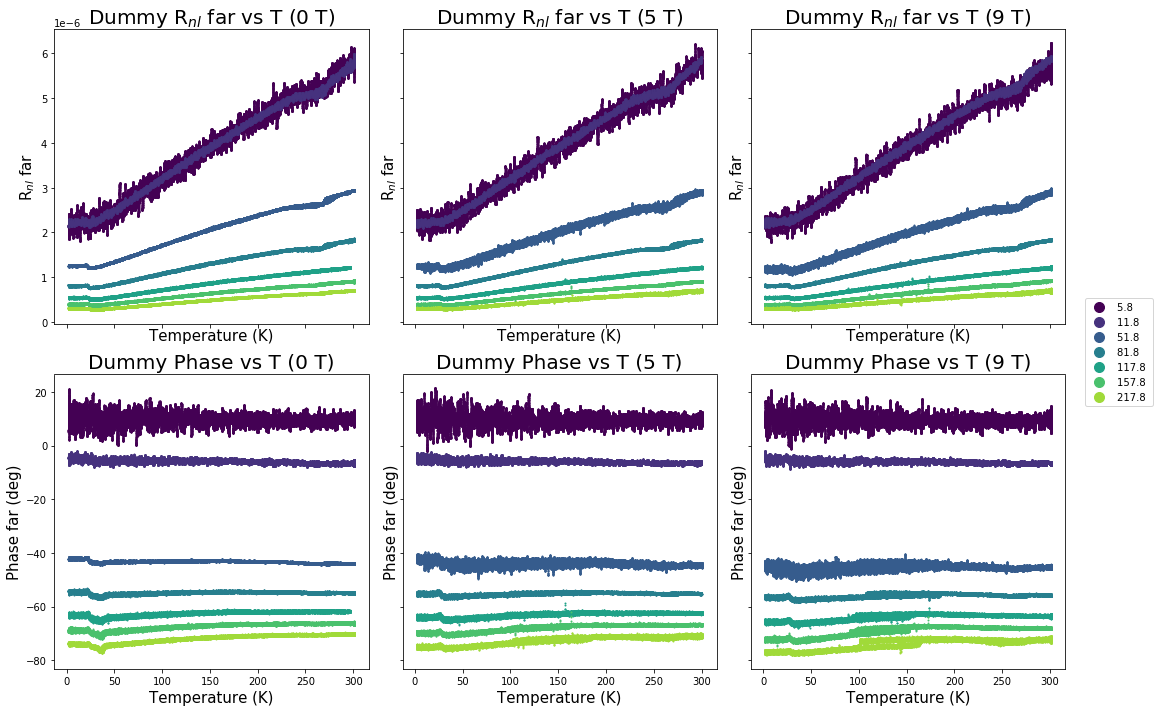

In [49]:
reset_mpl_params()

dates = ['20191223_{}'.format(i+1) for i in [0,2,3,4,5,6,7,8]]
freq_arr = [5.8, 51.8, 81.8, 117.8, 157.8, 217.8, 11.8]
dates = [date for _,date in sorted(zip(freq_arr,dates))]
freq_arr = sorted(freq_arr)
labels = [str(freq) for freq in freq_arr]
field_arr = [0,5,9]
num_colors = len(freq_arr)

cmap=plt.cm.get_cmap('viridis')
fig_far, axes = plt.subplots(2, 3, figsize=(15,10), sharex=True, sharey='row')
for ax in axes.flatten():
    ax.set_prop_cycle(color=[cmap(1.*i/num_colors) for i in range(num_colors)])

for j,H in enumerate(field_arr):
    for i, date in enumerate(dates):
        load_data(date)

        extractArrays(temperature, R_far, field, [H], TOL=FIELD_TOL, sweep='down', title=title_str + ' R$_{nl}$ far vs T (%s T)' % str(H),
                                    xlabel='Temperature (K)', ylabel=r'R$_{nl}$ far', fig=fig_far, ax=axes.flatten()[j], labels=[labels[i]], sep=False
                                   )
        extractArrays(temperature, phase_far, field, [H], TOL=FIELD_TOL, sweep='down', title=title_str + ' Phase vs T ({0} T)'.format(str(H)),
                                    xlabel='Temperature (K)', ylabel='Phase far (deg)', fig=fig_far, ax=axes.flatten()[j+3], labels=[labels[i]], sep=False
                                   )

handles, labels = axes[0,0].get_legend_handles_labels()
fig_far.legend(handles, labels, markerscale=10, bbox_to_anchor=(1,0.5), loc='center left')
fig_far.tight_layout()
interactiveButton(fig_far, 'dummy_sweeps_far')

# Test cells
All cells below are for testing

In [4]:
'X' in 'LI1_X'

True

In [24]:
np.arctan2(0.5/0.5)

ValueError: invalid number of arguments

In [7]:
!(0)

/bin/bash: 0: command not found
